In [1]:
import scipy.io as sio
import numpy as np
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
data_mat = sio.loadmat('/home/yzy/SIMS/data_mat_0614_2.mat')
data_mat=data_mat['data_mat']
num_features = 200
img_size = 256

In [2]:
from sklearn.metrics.pairwise import euclidean_distances
import pickle
batch_dict = {}
batch_dict_robust = {}
batch_dict_minmax = {}
batch_dict_standard = {}
label_dict = {}
cell_dict = {}
dist_dict = {}
FE_dict={}
for i in range(13):
    print(i)
    cur_data = data_mat[data_mat[:,0]==i+1,6:num_features+6]
    cur_data_robust = RobustScaler().fit_transform(cur_data)
    cur_data_minmax = MinMaxScaler().fit_transform(cur_data)
    cur_data_standard = StandardScaler().fit_transform(cur_data)
    batch_dict[i+1] = cur_data
    batch_dict_robust[i+1] = cur_data_robust
    batch_dict_minmax[i+1] = cur_data_minmax
    batch_dict_standard[i+1] = cur_data_standard
    label_dict[i+1] = data_mat[data_mat[:,0]==i+1,2]
    cell_dict[i+1] = data_mat[data_mat[:,0]==i+1,1]
    FE_dict[i+1] = data_mat[data_mat[:,0]==i+1,4]
    cur_batch_idx = data_mat[data_mat[:,0]==i+1,3]
#     cur_length = cur_data.shape[0]
#     cur_dist = np.zeros(shape=(cur_length,cur_length))
#     cur_ij_mat = np.zeros(shape=(cur_length,2))
#     for j in range(cur_length):
        
#         ii,jj=ind2ij(cur_batch_idx[j],img_size)
        
#         cur_ij_mat[j,0] = ii
#         cur_ij_mat[j,1] = jj
#     cur_dist = euclidean_distances(cur_ij_mat)
    
#     dist_dict[i+1] = cur_dist
# pickle.dump(dist_dict,open("/home/yzy/SIMS/eu_dist_dict_13.pkl","wb"))

0
1
2
3
4
5
6
7
8
9
10
11
12


In [25]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(20,20))
# plt.boxplot(batch2_robust_minmax[:,:num_features])
# plt.show()

In [5]:
batch2_minmax.shape

NameError: name 'batch2_minmax' is not defined

In [3]:
from keras.layers import Dense,Input
from keras.models import Model
import numpy as np
import keras.backend as K
from sklearn.preprocessing import MinMaxScaler




batch_num = 2

num_cell = int(np.max(cell_dict[batch_num]))
cell_pixel_dict = {}
cell_label_list = []
cell_FE_dict = {}
cell_weight_dict = {}
batch_data = batch_dict_standard[batch_num]
batch_cellidx = cell_dict[batch_num]
batch_label = label_dict[batch_num]
batch_FE = FE_dict[batch_num]
for i in range(num_cell):
    
    cur_cell_mat = batch_data[batch_cellidx==i+1,:]
    cell_pixel_dict[i+1]=cur_cell_mat
    cur_cell_label = batch_label[batch_cellidx==i+1][0]
#     cell_label_dict[i] = cur_cell_label
    cell_label_list.append(cur_cell_label)
    
    cur_FE =  batch_FE[batch_cellidx==i+1]
    
    cell_FE_dict[i+1] = cur_FE
    cur_weight = MinMaxScaler(feature_range=(0,1)).fit_transform(cur_FE)
    cur_weight = cur_weight/np.sum(cur_weight)
    cell_weight_dict[i+1] = cur_weight
# n=10
# # 每个AE有100个训练数据
# m=100
# #每个数字有50个set
# num_set = 50

# # ae_li = []
# set_data = np.zeros(shape=(num_set*n,m,784))
# set_label = np.zeros(shape=(num_set*n,))
# set_idx = 0
# for i in range(n):
#     for j in range(num_set):
#         cur_set = class_x[i,m*j:m*(j+1),:]
#         set_data[set_idx,:,:] = cur_set
#         set_label[set_idx] = i
#         set_idx  = set_idx+1
        
# #     cur_train = class_x[i,:m,:]
# #     cur_test = class_x[i,m:2*m,:]
# #     cur_ae = make_AE()
# #     cur_ae.fit(cur_train,cur_train,epochs=epochs,shuffle=True,batch_size=20,validation_data=(cur_test,cur_test))
# #     ae_li.append(cur_ae)
    
    
    

Using TensorFlow backend.
/home/yzy/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/yzy/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/yzy/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueErr

In [61]:
import tensorflow as tf

def correlation_coefficient_loss(y_true, y_pred):
    x = y_true
    y = y_pred
    mx = K.mean(x)
    my = K.mean(y)
    xm, ym = x-mx, y-my
    r_num = K.sum(tf.multiply(xm,ym))
    r_den = K.sqrt(tf.multiply(K.sum(K.square(xm)), K.sum(K.square(ym))))
    r = r_num / r_den

    r = K.maximum(K.minimum(r, 1.0), -1.0)
    return 1 - K.square(r)
def make_AE(input_dim):
    acti = activa = K.relu
    x_input = Input(shape = (input_dim,))
    x = Dense(512,activation=acti,use_bias=False)(x_input)
    x = Dense(256,activation=acti,use_bias=False)(x)
    
    x = Dense(512,activation=acti,use_bias=False)(x)
    x = Dense(input_dim,activation='linear',use_bias=False)(x)
    ae = Model(x_input,x)
    ae.compile(optimizer='adadelta',loss=correlation_coefficient_loss)
    return ae

In [39]:
cell_mean_profile = np.zeros(shape=(num_cell,num_features))
for i in range(num_cell):
    cur_cell_pixels = cell_pixel_dict[i+1]
    cur_weight = cell_weight_dict[i+1]
    cur_cell_mean = np.average(cur_cell_pixels,weights=cur_weight,axis=0)
    cell_mean_profile[i,:] = cur_cell_mean
cell_mean_profile = cell_mean_profile/cell_mean_profile[:,0][:,None]

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 36 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 37 / 37
[t-SNE] Mean sigma: 1.979914
[t-SNE] KL divergence after 75 iterations with early exaggeration: 0.672779
[t-SNE] Error after 100 iterations: 0.672779


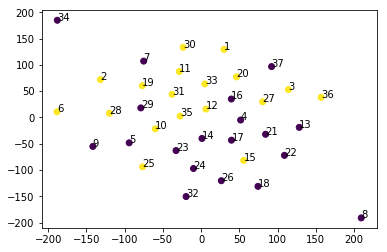

In [46]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
# dist_mat_sym1 = np.exp(10*dist_mat_sym)
y = TSNE(n_components=2,verbose=1,perplexity=30).fit_transform(cell_mean_profile)
plt.figure(figsize=(6,6))
fig,ax=plt.subplots()
# fig,ax=plt.figure(figsize=(6,6))
ax.scatter(y[:,0],y[:,1],c=cell_label_list)
# plt.show()
# ax
for i in range(num_cell):
    
    ax.annotate(i+1, (y[i,0],y[i,1]))
plt.show()

In [43]:
cur_weight

array([ 0.        ,  0.01331384,  0.00249473,  0.01200289,  0.00785961,
        0.00476166,  0.00920825,  0.00481927,  0.00157909,  0.01353826,
        0.02385409,  0.0163303 ,  0.01978663,  0.01950371,  0.01132608,
        0.00760653,  0.01976019,  0.02336942,  0.02483781,  0.02650571,
        0.01532709,  0.02368693,  0.01197692,  0.01243516,  0.01918181,
        0.02314397,  0.02545752,  0.02641304,  0.02357532,  0.02754797,
        0.01765388,  0.02331572,  0.01141965,  0.01150621,  0.01025823,
        0.01450413,  0.02099164,  0.02771444,  0.02854395,  0.02982225,
        0.02845982,  0.01513371,  0.02383741,  0.01686509,  0.00320808,
        0.01782649,  0.02006183,  0.01918742,  0.03222493,  0.02571893,
        0.02442133,  0.01927045,  0.0157913 ,  0.00239773,  0.00588604,
        0.00987172,  0.01655351,  0.01260024,  0.01761363,  0.00376541,
        0.00237102])

In [73]:
# import scipy
# a=cur_train[0,:][None,:]
# aa=ae_li[0].predict(a)


# b=5*cur_train[0,:][None,:]
# bb=ae_li[0].predict(b)
# scipy.stats.pearsonr(a,aa)[0]
# # type(a)




ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [74]:
ae_li = []
epochs=200
for i in range(num_cell):
    i = i + 1
    cur_train = cell_pixel_dict[i]
    
    cur_weight = cell_weight_dict[i]
    cur_label = cell_label_list[i-1]
    print(cur_train.shape,cur_weight.shape)
#     cur_test = class_x[i,m:2*m,:]
    cur_ae = make_AE(num_features)
#     cur_ae.summary()
#     cur_ae.fit(cur_train,cur_train,epochs=epochs,shuffle=True,batch_size=200,sample_weight=cur_weight)
    cur_ae.fit(cur_train,cur_train,epochs=epochs,shuffle=True,batch_size=200)


#     cur_ae.save('/home/yzy/SIMS/keras_model/batch{batch_num}/SIMS_ae_{cell_num}.h5'.format(cell_num=i,batch_num=batch_num))
    ae_li.append(cur_ae)
    print(i,'++++++++++++++++++++++++')
    

(83, 200) (83,)
Epoch 1/200
83/83 [==============================] - 3s - loss: 0.9997
Epoch 2/200
83/83 [==============================] - 0s - loss: 0.9989
Epoch 3/200
83/83 [==============================] - 0s - loss: 0.9964
Epoch 4/200
83/83 [==============================] - 0s - loss: 0.9899
Epoch 5/200
83/83 [==============================] - 0s - loss: 0.9775
Epoch 6/200
83/83 [==============================] - 0s - loss: 0.9592
Epoch 7/200
83/83 [==============================] - 0s - loss: 0.9377
Epoch 8/200
83/83 [==============================] - 0s - loss: 0.9154
Epoch 9/200
83/83 [==============================] - 0s - loss: 0.8946
Epoch 10/200
83/83 [==============================] - 0s - loss: 0.8755
Epoch 11/200
83/83 [==============================] - 0s - loss: 0.8581
Epoch 12/200
83/83 [==============================] - 0s - loss: 0.8443
Epoch 13/200
83/83 [==============================] - 0s - loss: 0.8387
Epoch 14/200
83/83 [==============================] - 0s 

83/83 [==============================] - 0s - loss: 0.1430
Epoch 115/200
83/83 [==============================] - 0s - loss: 0.1360
Epoch 116/200
83/83 [==============================] - 0s - loss: 0.1315
Epoch 117/200
83/83 [==============================] - 0s - loss: 0.1298
Epoch 118/200
83/83 [==============================] - 0s - loss: 0.1281
Epoch 119/200
83/83 [==============================] - 0s - loss: 0.1279
Epoch 120/200
83/83 [==============================] - 0s - loss: 0.1281
Epoch 121/200
83/83 [==============================] - 0s - loss: 0.1306
Epoch 122/200
83/83 [==============================] - 0s - loss: 0.1325
Epoch 123/200
83/83 [==============================] - 0s - loss: 0.1321
Epoch 124/200
83/83 [==============================] - 0s - loss: 0.1253
Epoch 125/200
83/83 [==============================] - 0s - loss: 0.1209
Epoch 126/200
83/83 [==============================] - 0s - loss: 0.1148
Epoch 127/200
83/83 [==============================] - 0s - loss:

44/44 [==============================] - 0s - loss: 0.5935
Epoch 27/200
44/44 [==============================] - 0s - loss: 0.5619
Epoch 28/200
44/44 [==============================] - 0s - loss: 0.5491
Epoch 29/200
44/44 [==============================] - 0s - loss: 0.5426
Epoch 30/200
44/44 [==============================] - 0s - loss: 0.5185
Epoch 31/200
44/44 [==============================] - 0s - loss: 0.5257
Epoch 32/200
44/44 [==============================] - 0s - loss: 0.4844
Epoch 33/200
44/44 [==============================] - 0s - loss: 0.4947
Epoch 34/200
44/44 [==============================] - 0s - loss: 0.4561
Epoch 35/200
44/44 [==============================] - 0s - loss: 0.4521
Epoch 36/200
44/44 [==============================] - 0s - loss: 0.4489
Epoch 37/200
44/44 [==============================] - 0s - loss: 0.4700
Epoch 38/200
44/44 [==============================] - 0s - loss: 0.4211
Epoch 39/200
44/44 [==============================] - 0s - loss: 0.4163
Epoch

44/44 [==============================] - 0s - loss: 0.0248
Epoch 140/200
44/44 [==============================] - 0s - loss: 0.0254
Epoch 141/200
44/44 [==============================] - 0s - loss: 0.0249
Epoch 142/200
44/44 [==============================] - 0s - loss: 0.0238
Epoch 143/200
44/44 [==============================] - 0s - loss: 0.0219
Epoch 144/200
44/44 [==============================] - 0s - loss: 0.0200
Epoch 145/200
44/44 [==============================] - 0s - loss: 0.0180
Epoch 146/200
44/44 [==============================] - 0s - loss: 0.0166
Epoch 147/200
44/44 [==============================] - 0s - loss: 0.0153
Epoch 148/200
44/44 [==============================] - 0s - loss: 0.0142
Epoch 149/200
44/44 [==============================] - 0s - loss: 0.0134
Epoch 150/200
44/44 [==============================] - 0s - loss: 0.0127
Epoch 151/200
44/44 [==============================] - 0s - loss: 0.0123
Epoch 152/200
44/44 [==============================] - 0s - loss:

180/180 [==============================] - 0s - loss: 0.7535
Epoch 51/200
180/180 [==============================] - 0s - loss: 0.7191
Epoch 52/200
180/180 [==============================] - 0s - loss: 0.7515
Epoch 53/200
180/180 [==============================] - 0s - loss: 0.7132
Epoch 54/200
180/180 [==============================] - 0s - loss: 0.7323
Epoch 55/200
180/180 [==============================] - 0s - loss: 0.6922
Epoch 56/200
180/180 [==============================] - 0s - loss: 0.7077
Epoch 57/200
180/180 [==============================] - 0s - loss: 0.7124
Epoch 58/200
180/180 [==============================] - 0s - loss: 0.6822
Epoch 59/200
180/180 [==============================] - 0s - loss: 0.7257
Epoch 60/200
180/180 [==============================] - 0s - loss: 0.6743
Epoch 61/200
180/180 [==============================] - 0s - loss: 0.7154
Epoch 62/200
180/180 [==============================] - 0s - loss: 0.6943
Epoch 63/200
180/180 [=============================

180/180 [==============================] - 0s - loss: 0.3423
Epoch 161/200
180/180 [==============================] - 0s - loss: 0.3318
Epoch 162/200
180/180 [==============================] - 0s - loss: 0.3281
Epoch 163/200
180/180 [==============================] - 0s - loss: 0.3362
Epoch 164/200
180/180 [==============================] - 0s - loss: 0.3386
Epoch 165/200
180/180 [==============================] - 0s - loss: 0.3494
Epoch 166/200
180/180 [==============================] - 0s - loss: 0.3473
Epoch 167/200
180/180 [==============================] - 0s - loss: 0.3320
Epoch 168/200
180/180 [==============================] - 0s - loss: 0.3214
Epoch 169/200
180/180 [==============================] - 0s - loss: 0.3111
Epoch 170/200
180/180 [==============================] - 0s - loss: 0.3087
Epoch 171/200
180/180 [==============================] - 0s - loss: 0.3087
Epoch 172/200
180/180 [==============================] - 0s - loss: 0.3147
Epoch 173/200
180/180 [================

58/58 [==============================] - 0s - loss: 0.2266
Epoch 72/200
58/58 [==============================] - 0s - loss: 0.2149
Epoch 73/200
58/58 [==============================] - 0s - loss: 0.2092
Epoch 74/200
58/58 [==============================] - 0s - loss: 0.2108
Epoch 75/200
58/58 [==============================] - 0s - loss: 0.2149
Epoch 76/200
58/58 [==============================] - 0s - loss: 0.1922
Epoch 77/200
58/58 [==============================] - 0s - loss: 0.1760
Epoch 78/200
58/58 [==============================] - 0s - loss: 0.1644
Epoch 79/200
58/58 [==============================] - 0s - loss: 0.1665
Epoch 80/200
58/58 [==============================] - 0s - loss: 0.1733
Epoch 81/200
58/58 [==============================] - 0s - loss: 0.1732
Epoch 82/200
58/58 [==============================] - 0s - loss: 0.1650
Epoch 83/200
58/58 [==============================] - 0s - loss: 0.1514
Epoch 84/200
58/58 [==============================] - 0s - loss: 0.1512
Epoch

58/58 [==============================] - 0s - loss: 0.0155
Epoch 184/200
58/58 [==============================] - 0s - loss: 0.0154
Epoch 185/200
58/58 [==============================] - 0s - loss: 0.0148
Epoch 186/200
58/58 [==============================] - 0s - loss: 0.0150
Epoch 187/200
58/58 [==============================] - 0s - loss: 0.0147
Epoch 188/200
58/58 [==============================] - 0s - loss: 0.0152
Epoch 189/200
58/58 [==============================] - 0s - loss: 0.0153
Epoch 190/200
58/58 [==============================] - 0s - loss: 0.0160
Epoch 191/200
58/58 [==============================] - 0s - loss: 0.0163
Epoch 192/200
58/58 [==============================] - 0s - loss: 0.0166
Epoch 193/200
58/58 [==============================] - 0s - loss: 0.0166
Epoch 194/200
58/58 [==============================] - 0s - loss: 0.0164
Epoch 195/200
58/58 [==============================] - 0s - loss: 0.0160
Epoch 196/200
58/58 [==============================] - 0s - loss:

222/222 [==============================] - 0s - loss: 0.4258     
Epoch 87/200
222/222 [==============================] - 0s - loss: 0.4198     
Epoch 88/200
222/222 [==============================] - 0s - loss: 0.4368     
Epoch 89/200
222/222 [==============================] - 0s - loss: 0.4072     
Epoch 90/200
222/222 [==============================] - 0s - loss: 0.3991     
Epoch 91/200
222/222 [==============================] - 0s - loss: 0.4139     
Epoch 92/200
222/222 [==============================] - 0s - loss: 0.3784     
Epoch 93/200
222/222 [==============================] - 0s - loss: 0.3788     
Epoch 94/200
222/222 [==============================] - 0s - loss: 0.3968     
Epoch 95/200
222/222 [==============================] - 0s - loss: 0.4035     
Epoch 96/200
222/222 [==============================] - 0s - loss: 0.3758     
Epoch 97/200
222/222 [==============================] - 0s - loss: 0.3694     
Epoch 98/200
222/222 [==============================] - 0s - loss

222/222 [==============================] - 0s - loss: 0.1495     
Epoch 188/200
222/222 [==============================] - 0s - loss: 0.1418     
Epoch 189/200
222/222 [==============================] - ETA: 0s - loss: 0.132 - 0s - loss: 0.1331     
Epoch 190/200
222/222 [==============================] - 0s - loss: 0.1334     
Epoch 191/200
222/222 [==============================] - 0s - loss: 0.1374     
Epoch 192/200
222/222 [==============================] - 0s - loss: 0.1347     
Epoch 193/200
222/222 [==============================] - 0s - loss: 0.1357     
Epoch 194/200
222/222 [==============================] - 0s - loss: 0.1464     
Epoch 195/200
222/222 [==============================] - 0s - loss: 0.1414     
Epoch 196/200
222/222 [==============================] - 0s - loss: 0.1420     
Epoch 197/200
222/222 [==============================] - 0s - loss: 0.1380     
Epoch 198/200
222/222 [==============================] - 0s - loss: 0.1372     
Epoch 199/200
222/222 [=======

91/91 [==============================] - 0s - loss: 0.3083
Epoch 99/200
91/91 [==============================] - 0s - loss: 0.3164
Epoch 100/200
91/91 [==============================] - 0s - loss: 0.3162
Epoch 101/200
91/91 [==============================] - 0s - loss: 0.3159
Epoch 102/200
91/91 [==============================] - 0s - loss: 0.3016
Epoch 103/200
91/91 [==============================] - 0s - loss: 0.2888
Epoch 104/200
91/91 [==============================] - 0s - loss: 0.2854
Epoch 105/200
91/91 [==============================] - 0s - loss: 0.2787
Epoch 106/200
91/91 [==============================] - 0s - loss: 0.2787
Epoch 107/200
91/91 [==============================] - 0s - loss: 0.2603
Epoch 108/200
91/91 [==============================] - 0s - loss: 0.2555
Epoch 109/200
91/91 [==============================] - 0s - loss: 0.2592
Epoch 110/200
91/91 [==============================] - 0s - loss: 0.2631
Epoch 111/200
91/91 [==============================] - 0s - loss: 

166/166 [==============================] - 0s - loss: 0.9261
Epoch 10/200
166/166 [==============================] - 0s - loss: 0.9062
Epoch 11/200
166/166 [==============================] - 0s - loss: 0.8895
Epoch 12/200
166/166 [==============================] - 0s - loss: 0.8759
Epoch 13/200
166/166 [==============================] - 0s - loss: 0.8650
Epoch 14/200
166/166 [==============================] - 0s - loss: 0.8561
Epoch 15/200
166/166 [==============================] - 0s - loss: 0.8487
Epoch 16/200
166/166 [==============================] - 0s - loss: 0.8439
Epoch 17/200
166/166 [==============================] - 0s - loss: 0.8436
Epoch 18/200
166/166 [==============================] - 0s - loss: 0.8440
Epoch 19/200
166/166 [==============================] - 0s - loss: 0.8385
Epoch 20/200
166/166 [==============================] - 0s - loss: 0.8343
Epoch 21/200
166/166 [==============================] - 0s - loss: 0.8276
Epoch 22/200
166/166 [=============================

166/166 [==============================] - 0s - loss: 0.4441
Epoch 120/200
166/166 [==============================] - 0s - loss: 0.4513
Epoch 121/200
166/166 [==============================] - 0s - loss: 0.4497
Epoch 122/200
166/166 [==============================] - 0s - loss: 0.4144
Epoch 123/200
166/166 [==============================] - 0s - loss: 0.4257
Epoch 124/200
166/166 [==============================] - 0s - loss: 0.4110
Epoch 125/200
166/166 [==============================] - 0s - loss: 0.4206
Epoch 126/200
166/166 [==============================] - 0s - loss: 0.4115
Epoch 127/200
166/166 [==============================] - 0s - loss: 0.3989
Epoch 128/200
166/166 [==============================] - 0s - loss: 0.3829
Epoch 129/200
166/166 [==============================] - 0s - loss: 0.3902
Epoch 130/200
166/166 [==============================] - 0s - loss: 0.3856
Epoch 131/200
166/166 [==============================] - 0s - loss: 0.3758
Epoch 132/200
166/166 [================

206/206 [==============================] - 0s - loss: 0.7977     
Epoch 27/200
206/206 [==============================] - 0s - loss: 0.7965     
Epoch 28/200
206/206 [==============================] - 0s - loss: 0.7911     
Epoch 29/200
206/206 [==============================] - 0s - loss: 0.7973     
Epoch 30/200
206/206 [==============================] - 0s - loss: 0.7847     
Epoch 31/200
206/206 [==============================] - 0s - loss: 0.7898     
Epoch 32/200
206/206 [==============================] - 0s - loss: 0.7765     
Epoch 33/200
206/206 [==============================] - 0s - loss: 0.7800     
Epoch 34/200
206/206 [==============================] - 0s - loss: 0.7689     
Epoch 35/200
206/206 [==============================] - 0s - loss: 0.7705     
Epoch 36/200
206/206 [==============================] - 0s - loss: 0.7491     
Epoch 37/200
206/206 [==============================] - 0s - loss: 0.7452     
Epoch 38/200
206/206 [==============================] - 0s - loss

206/206 [==============================] - 0s - loss: 0.3771     
Epoch 129/200
206/206 [==============================] - 0s - loss: 0.3609     
Epoch 130/200
206/206 [==============================] - 0s - loss: 0.3577     
Epoch 131/200
206/206 [==============================] - 0s - loss: 0.3861     
Epoch 132/200
206/206 [==============================] - 0s - loss: 0.3803     
Epoch 133/200
206/206 [==============================] - 0s - loss: 0.3909     
Epoch 134/200
206/206 [==============================] - 0s - loss: 0.3649     
Epoch 135/200
206/206 [==============================] - 0s - loss: 0.3507     
Epoch 136/200
206/206 [==============================] - 0s - loss: 0.3488     
Epoch 137/200
206/206 [==============================] - 0s - loss: 0.3630     
Epoch 138/200
206/206 [==============================] - 0s - loss: 0.3721     
Epoch 139/200
206/206 [==============================] - 0s - loss: 0.3523     
Epoch 140/200
206/206 [==============================]

71/71 [==============================] - 0s - loss: 0.6577
Epoch 34/200
71/71 [==============================] - 0s - loss: 0.6265
Epoch 35/200
71/71 [==============================] - 0s - loss: 0.5944
Epoch 36/200
71/71 [==============================] - 0s - loss: 0.6220
Epoch 37/200
71/71 [==============================] - 0s - loss: 0.6118
Epoch 38/200
71/71 [==============================] - 0s - loss: 0.5967
Epoch 39/200
71/71 [==============================] - 0s - loss: 0.5924
Epoch 40/200
71/71 [==============================] - 0s - loss: 0.5521
Epoch 41/200
71/71 [==============================] - 0s - loss: 0.5722
Epoch 42/200
71/71 [==============================] - 0s - loss: 0.6037
Epoch 43/200
71/71 [==============================] - 0s - loss: 0.5789
Epoch 44/200
71/71 [==============================] - 0s - loss: 0.5335
Epoch 45/200
71/71 [==============================] - 0s - loss: 0.5347
Epoch 46/200
71/71 [==============================] - 0s - loss: 0.5159
Epoch

71/71 [==============================] - 0s - loss: 0.0572
Epoch 147/200
71/71 [==============================] - 0s - loss: 0.0573
Epoch 148/200
71/71 [==============================] - 0s - loss: 0.0591
Epoch 149/200
71/71 [==============================] - 0s - loss: 0.0592
Epoch 150/200
71/71 [==============================] - 0s - loss: 0.0600
Epoch 151/200
71/71 [==============================] - 0s - loss: 0.0579
Epoch 152/200
71/71 [==============================] - 0s - loss: 0.0571
Epoch 153/200
71/71 [==============================] - 0s - loss: 0.0552
Epoch 154/200
71/71 [==============================] - 0s - loss: 0.0555
Epoch 155/200
71/71 [==============================] - 0s - loss: 0.0551
Epoch 156/200
71/71 [==============================] - 0s - loss: 0.0556
Epoch 157/200
71/71 [==============================] - 0s - loss: 0.0547
Epoch 158/200
71/71 [==============================] - 0s - loss: 0.0551
Epoch 159/200
71/71 [==============================] - 0s - loss:

122/122 [==============================] - 0s - loss: 0.6579
Epoch 58/200
122/122 [==============================] - 0s - loss: 0.6287
Epoch 59/200
122/122 [==============================] - 0s - loss: 0.6522
Epoch 60/200
122/122 [==============================] - 0s - loss: 0.6385
Epoch 61/200
122/122 [==============================] - 0s - loss: 0.6113
Epoch 62/200
122/122 [==============================] - 0s - loss: 0.6043
Epoch 63/200
122/122 [==============================] - 0s - loss: 0.6214
Epoch 64/200
122/122 [==============================] - 0s - loss: 0.5996
Epoch 65/200
122/122 [==============================] - 0s - loss: 0.5820
Epoch 66/200
122/122 [==============================] - 0s - loss: 0.5628
Epoch 67/200
122/122 [==============================] - 0s - loss: 0.6017
Epoch 68/200
122/122 [==============================] - 0s - loss: 0.5849
Epoch 69/200
122/122 [==============================] - 0s - loss: 0.5771
Epoch 70/200
122/122 [=============================

122/122 [==============================] - 0s - loss: 0.1987
Epoch 167/200
122/122 [==============================] - 0s - loss: 0.2007
Epoch 168/200
122/122 [==============================] - 0s - loss: 0.2029
Epoch 169/200
122/122 [==============================] - 0s - loss: 0.1996
Epoch 170/200
122/122 [==============================] - 0s - loss: 0.1924
Epoch 171/200
122/122 [==============================] - 0s - loss: 0.1849
Epoch 172/200
122/122 [==============================] - 0s - loss: 0.1797
Epoch 173/200
122/122 [==============================] - 0s - loss: 0.1781
Epoch 174/200
122/122 [==============================] - 0s - loss: 0.1812
Epoch 175/200
122/122 [==============================] - 0s - loss: 0.1820
Epoch 176/200
122/122 [==============================] - 0s - loss: 0.1770
Epoch 177/200
122/122 [==============================] - 0s - loss: 0.1689
Epoch 178/200
122/122 [==============================] - 0s - loss: 0.1639
Epoch 179/200
122/122 [================

145/145 [==============================] - 0s - loss: 0.5348
Epoch 76/200
145/145 [==============================] - 0s - loss: 0.5282
Epoch 77/200
145/145 [==============================] - 0s - loss: 0.5205
Epoch 78/200
145/145 [==============================] - 0s - loss: 0.5247
Epoch 79/200
145/145 [==============================] - 0s - loss: 0.5109
Epoch 80/200
145/145 [==============================] - 0s - loss: 0.5064
Epoch 81/200
145/145 [==============================] - 0s - loss: 0.5028
Epoch 82/200
145/145 [==============================] - 0s - loss: 0.5068
Epoch 83/200
145/145 [==============================] - 0s - loss: 0.4918
Epoch 84/200
145/145 [==============================] - 0s - loss: 0.5045
Epoch 85/200
145/145 [==============================] - 0s - loss: 0.4702
Epoch 86/200
145/145 [==============================] - 0s - loss: 0.4795
Epoch 87/200
145/145 [==============================] - 0s - loss: 0.4796
Epoch 88/200
145/145 [=============================

145/145 [==============================] - 0s - loss: 0.1784
Epoch 185/200
145/145 [==============================] - 0s - loss: 0.1840
Epoch 186/200
145/145 [==============================] - 0s - loss: 0.1919
Epoch 187/200
145/145 [==============================] - 0s - loss: 0.1828
Epoch 188/200
145/145 [==============================] - 0s - loss: 0.1759
Epoch 189/200
145/145 [==============================] - 0s - loss: 0.1680
Epoch 190/200
145/145 [==============================] - 0s - loss: 0.1713
Epoch 191/200
145/145 [==============================] - 0s - loss: 0.1731
Epoch 192/200
145/145 [==============================] - 0s - loss: 0.1826
Epoch 193/200
145/145 [==============================] - 0s - loss: 0.1946
Epoch 194/200
145/145 [==============================] - 0s - loss: 0.1831
Epoch 195/200
145/145 [==============================] - 0s - loss: 0.1749
Epoch 196/200
145/145 [==============================] - 0s - loss: 0.1645
Epoch 197/200
145/145 [================

168/168 [==============================] - 0s - loss: 0.5332
Epoch 95/200
168/168 [==============================] - 0s - loss: 0.5354
Epoch 96/200
168/168 [==============================] - 0s - loss: 0.5225
Epoch 97/200
168/168 [==============================] - 0s - loss: 0.5317
Epoch 98/200
168/168 [==============================] - 0s - loss: 0.5205
Epoch 99/200
168/168 [==============================] - 0s - loss: 0.5002
Epoch 100/200
168/168 [==============================] - 0s - loss: 0.4981
Epoch 101/200
168/168 [==============================] - 0s - loss: 0.5138
Epoch 102/200
168/168 [==============================] - 0s - loss: 0.5224
Epoch 103/200
168/168 [==============================] - 0s - loss: 0.5110
Epoch 104/200
168/168 [==============================] - 0s - loss: 0.4901
Epoch 105/200
168/168 [==============================] - 0s - loss: 0.4921
Epoch 106/200
168/168 [==============================] - 0s - loss: 0.4977
Epoch 107/200
168/168 [=====================

56/56 [==============================] - 0s - loss: 0.9935
Epoch 4/200
56/56 [==============================] - 0s - loss: 0.9812
Epoch 5/200
56/56 [==============================] - 0s - loss: 0.9590
Epoch 6/200
56/56 [==============================] - 0s - loss: 0.9307
Epoch 7/200
56/56 [==============================] - 0s - loss: 0.9020
Epoch 8/200
56/56 [==============================] - 0s - loss: 0.8753
Epoch 9/200
56/56 [==============================] - 0s - loss: 0.8517
Epoch 10/200
56/56 [==============================] - 0s - loss: 0.8301
Epoch 11/200
56/56 [==============================] - 0s - loss: 0.8101
Epoch 12/200
56/56 [==============================] - 0s - loss: 0.7959
Epoch 13/200
56/56 [==============================] - 0s - loss: 0.7961
Epoch 14/200
56/56 [==============================] - 0s - loss: 0.7863
Epoch 15/200
56/56 [==============================] - 0s - loss: 0.7795
Epoch 16/200
56/56 [==============================] - 0s - loss: 0.7567
Epoch 17/20

56/56 [==============================] - 0s - loss: 0.0677
Epoch 117/200
56/56 [==============================] - 0s - loss: 0.0620
Epoch 118/200
56/56 [==============================] - 0s - loss: 0.0577
Epoch 119/200
56/56 [==============================] - 0s - loss: 0.0527
Epoch 120/200
56/56 [==============================] - 0s - loss: 0.0491
Epoch 121/200
56/56 [==============================] - 0s - loss: 0.0460
Epoch 122/200
56/56 [==============================] - 0s - loss: 0.0440
Epoch 123/200
56/56 [==============================] - 0s - loss: 0.0438
Epoch 124/200
56/56 [==============================] - 0s - loss: 0.0441
Epoch 125/200
56/56 [==============================] - 0s - loss: 0.0480
Epoch 126/200
56/56 [==============================] - 0s - loss: 0.0518
Epoch 127/200
56/56 [==============================] - 0s - loss: 0.0574
Epoch 128/200
56/56 [==============================] - 0s - loss: 0.0578
Epoch 129/200
56/56 [==============================] - 0s - loss:

43/43 [==============================] - 0s - loss: 0.5979
Epoch 29/200
43/43 [==============================] - 0s - loss: 0.5724
Epoch 30/200
43/43 [==============================] - 0s - loss: 0.5635
Epoch 31/200
43/43 [==============================] - 0s - loss: 0.5482
Epoch 32/200
43/43 [==============================] - 0s - loss: 0.5170
Epoch 33/200
43/43 [==============================] - 0s - loss: 0.5200
Epoch 34/200
43/43 [==============================] - 0s - loss: 0.5034
Epoch 35/200
43/43 [==============================] - 0s - loss: 0.5284
Epoch 36/200
43/43 [==============================] - 0s - loss: 0.4537
Epoch 37/200
43/43 [==============================] - 0s - loss: 0.4987
Epoch 38/200
43/43 [==============================] - 0s - loss: 0.4551
Epoch 39/200
43/43 [==============================] - 0s - loss: 0.4712
Epoch 40/200
43/43 [==============================] - 0s - loss: 0.4572
Epoch 41/200
43/43 [==============================] - 0s - loss: 0.4441
Epoch

43/43 [==============================] - 0s - loss: 0.0206
Epoch 142/200
43/43 [==============================] - 0s - loss: 0.0182
Epoch 143/200
43/43 [==============================] - 0s - loss: 0.0166
Epoch 144/200
43/43 [==============================] - 0s - loss: 0.0145
Epoch 145/200
43/43 [==============================] - 0s - loss: 0.0133
Epoch 146/200
43/43 [==============================] - 0s - loss: 0.0119
Epoch 147/200
43/43 [==============================] - 0s - loss: 0.0111
Epoch 148/200
43/43 [==============================] - 0s - loss: 0.0104
Epoch 149/200
43/43 [==============================] - 0s - loss: 0.0101
Epoch 150/200
43/43 [==============================] - 0s - loss: 0.0098
Epoch 151/200
43/43 [==============================] - 0s - loss: 0.0099
Epoch 152/200
43/43 [==============================] - 0s - loss: 0.0100
Epoch 153/200
43/43 [==============================] - 0s - loss: 0.0101
Epoch 154/200
43/43 [==============================] - 0s - loss:

91/91 [==============================] - 0s - loss: 0.4906
Epoch 54/200
91/91 [==============================] - 0s - loss: 0.5228
Epoch 55/200
91/91 [==============================] - 0s - loss: 0.5329
Epoch 56/200
91/91 [==============================] - 0s - loss: 0.5320
Epoch 57/200
91/91 [==============================] - 0s - loss: 0.4731
Epoch 58/200
91/91 [==============================] - 0s - loss: 0.5030
Epoch 59/200
91/91 [==============================] - 0s - loss: 0.4938
Epoch 60/200
91/91 [==============================] - 0s - loss: 0.5020
Epoch 61/200
91/91 [==============================] - 0s - loss: 0.4444
Epoch 62/200
91/91 [==============================] - 0s - loss: 0.4534
Epoch 63/200
91/91 [==============================] - 0s - loss: 0.4436
Epoch 64/200
91/91 [==============================] - 0s - loss: 0.4702
Epoch 65/200
91/91 [==============================] - 0s - loss: 0.4579
Epoch 66/200
91/91 [==============================] - 0s - loss: 0.4276
Epoch

91/91 [==============================] - 0s - loss: 0.0834
Epoch 167/200
91/91 [==============================] - 0s - loss: 0.0793
Epoch 168/200
91/91 [==============================] - 0s - loss: 0.0751
Epoch 169/200
91/91 [==============================] - 0s - loss: 0.0719
Epoch 170/200
91/91 [==============================] - 0s - loss: 0.0675
Epoch 171/200
91/91 [==============================] - 0s - loss: 0.0660
Epoch 172/200
91/91 [==============================] - 0s - loss: 0.0640
Epoch 173/200
91/91 [==============================] - 0s - loss: 0.0642
Epoch 174/200
91/91 [==============================] - 0s - loss: 0.0653
Epoch 175/200
91/91 [==============================] - 0s - loss: 0.0677
Epoch 176/200
91/91 [==============================] - 0s - loss: 0.0692
Epoch 177/200
91/91 [==============================] - 0s - loss: 0.0713
Epoch 178/200
91/91 [==============================] - 0s - loss: 0.0697
Epoch 179/200
91/91 [==============================] - 0s - loss:

277/277 [==============================] - 0s - loss: 0.4825     
Epoch 72/200
277/277 [==============================] - 0s - loss: 0.4709     
Epoch 73/200
277/277 [==============================] - 0s - loss: 0.4758     
Epoch 74/200
277/277 [==============================] - 0s - loss: 0.4769     
Epoch 75/200
277/277 [==============================] - 0s - loss: 0.4696     
Epoch 76/200
277/277 [==============================] - 0s - loss: 0.4460     
Epoch 77/200
277/277 [==============================] - 0s - loss: 0.4435     
Epoch 78/200
277/277 [==============================] - 0s - loss: 0.4457     
Epoch 79/200
277/277 [==============================] - 0s - loss: 0.4433     
Epoch 80/200
277/277 [==============================] - 0s - loss: 0.4480     
Epoch 81/200
277/277 [==============================] - 0s - loss: 0.4446     
Epoch 82/200
277/277 [==============================] - 0s - loss: 0.4236     
Epoch 83/200
277/277 [==============================] - 0s - loss

277/277 [==============================] - 0s - loss: 0.2006     
Epoch 174/200
277/277 [==============================] - 0s - loss: 0.1919     
Epoch 175/200
277/277 [==============================] - 0s - loss: 0.1799     
Epoch 176/200
277/277 [==============================] - 0s - loss: 0.1702     
Epoch 177/200
277/277 [==============================] - 0s - loss: 0.1716     
Epoch 178/200
277/277 [==============================] - ETA: 0s - loss: 0.178 - 0s - loss: 0.1786     
Epoch 179/200
277/277 [==============================] - 0s - loss: 0.1778     
Epoch 180/200
277/277 [==============================] - 0s - loss: 0.1720     
Epoch 181/200
277/277 [==============================] - 0s - loss: 0.1746     
Epoch 182/200
277/277 [==============================] - 0s - loss: 0.1730     
Epoch 183/200
277/277 [==============================] - 0s - loss: 0.1682     
Epoch 184/200
277/277 [==============================] - 0s - loss: 0.1650     
Epoch 185/200
277/277 [=======

128/128 [==============================] - 0s - loss: 0.5369
Epoch 81/200
128/128 [==============================] - 0s - loss: 0.5015
Epoch 82/200
128/128 [==============================] - 0s - loss: 0.4999
Epoch 83/200
128/128 [==============================] - 0s - loss: 0.5071
Epoch 84/200
128/128 [==============================] - 0s - loss: 0.5263
Epoch 85/200
128/128 [==============================] - 0s - loss: 0.4823
Epoch 86/200
128/128 [==============================] - 0s - loss: 0.4990
Epoch 87/200
128/128 [==============================] - 0s - loss: 0.4712
Epoch 88/200
128/128 [==============================] - 0s - loss: 0.4871
Epoch 89/200
128/128 [==============================] - 0s - loss: 0.4936
Epoch 90/200
128/128 [==============================] - 0s - loss: 0.4757
Epoch 91/200
128/128 [==============================] - 0s - loss: 0.4756
Epoch 92/200
128/128 [==============================] - 0s - loss: 0.4709
Epoch 93/200
128/128 [=============================

128/128 [==============================] - 0s - loss: 0.1509
Epoch 190/200
128/128 [==============================] - 0s - loss: 0.1544
Epoch 191/200
128/128 [==============================] - 0s - loss: 0.1502
Epoch 192/200
128/128 [==============================] - 0s - loss: 0.1433
Epoch 193/200
128/128 [==============================] - 0s - loss: 0.1424
Epoch 194/200
128/128 [==============================] - 0s - loss: 0.1433
Epoch 195/200
128/128 [==============================] - 0s - loss: 0.1501
Epoch 196/200
128/128 [==============================] - 0s - loss: 0.1587
Epoch 197/200
128/128 [==============================] - 0s - loss: 0.1571
Epoch 198/200
128/128 [==============================] - 0s - loss: 0.1489
Epoch 199/200
128/128 [==============================] - 0s - loss: 0.1386
Epoch 200/200
128/128 [==============================] - 0s - loss: 0.1349
17 ++++++++++++++++++++++++
(32, 200) (32,)
Epoch 1/200
32/32 [==============================] - 3s - loss: 0.9999

32/32 [==============================] - 0s - loss: 0.0145
Epoch 102/200
32/32 [==============================] - 0s - loss: 0.0143
Epoch 103/200
32/32 [==============================] - 0s - loss: 0.0141
Epoch 104/200
32/32 [==============================] - 0s - loss: 0.0143
Epoch 105/200
32/32 [==============================] - 0s - loss: 0.0147
Epoch 106/200
32/32 [==============================] - 0s - loss: 0.0154
Epoch 107/200
32/32 [==============================] - 0s - loss: 0.0165
Epoch 108/200
32/32 [==============================] - 0s - loss: 0.0176
Epoch 109/200
32/32 [==============================] - 0s - loss: 0.0186
Epoch 110/200
32/32 [==============================] - 0s - loss: 0.0194
Epoch 111/200
32/32 [==============================] - 0s - loss: 0.0201
Epoch 112/200
32/32 [==============================] - 0s - loss: 0.0198
Epoch 113/200
32/32 [==============================] - 0s - loss: 0.0194
Epoch 114/200
32/32 [==============================] - 0s - loss:

106/106 [==============================] - 0s - loss: 0.8457
Epoch 13/200
106/106 [==============================] - 0s - loss: 0.8350
Epoch 14/200
106/106 [==============================] - 0s - loss: 0.8288
Epoch 15/200
106/106 [==============================] - 0s - loss: 0.8279
Epoch 16/200
106/106 [==============================] - 0s - loss: 0.8233
Epoch 17/200
106/106 [==============================] - 0s - loss: 0.8167
Epoch 18/200
106/106 [==============================] - 0s - loss: 0.8058
Epoch 19/200
106/106 [==============================] - 0s - loss: 0.8060
Epoch 20/200
106/106 [==============================] - 0s - loss: 0.7963
Epoch 21/200
106/106 [==============================] - 0s - loss: 0.8026
Epoch 22/200
106/106 [==============================] - 0s - loss: 0.7832
Epoch 23/200
106/106 [==============================] - 0s - loss: 0.7918
Epoch 24/200
106/106 [==============================] - 0s - loss: 0.7719
Epoch 25/200
106/106 [=============================

106/106 [==============================] - 0s - loss: 0.2070
Epoch 123/200
106/106 [==============================] - 0s - loss: 0.2029
Epoch 124/200
106/106 [==============================] - 0s - loss: 0.2030
Epoch 125/200
106/106 [==============================] - 0s - loss: 0.2099
Epoch 126/200
106/106 [==============================] - 0s - loss: 0.2171
Epoch 127/200
106/106 [==============================] - 0s - loss: 0.2043
Epoch 128/200
106/106 [==============================] - 0s - loss: 0.2005
Epoch 129/200
106/106 [==============================] - 0s - loss: 0.1977
Epoch 130/200
106/106 [==============================] - 0s - loss: 0.2035
Epoch 131/200
106/106 [==============================] - 0s - loss: 0.2041
Epoch 132/200
106/106 [==============================] - 0s - loss: 0.1997
Epoch 133/200
106/106 [==============================] - 0s - loss: 0.2035
Epoch 134/200
106/106 [==============================] - 0s - loss: 0.2042
Epoch 135/200
106/106 [================

244/244 [==============================] - 0s - loss: 0.7580     
Epoch 30/200
244/244 [==============================] - 0s - loss: 0.7574     
Epoch 31/200
244/244 [==============================] - 0s - loss: 0.7548     
Epoch 32/200
244/244 [==============================] - 0s - loss: 0.7478     
Epoch 33/200
244/244 [==============================] - 0s - loss: 0.7193     
Epoch 34/200
244/244 [==============================] - 0s - loss: 0.7387     
Epoch 35/200
244/244 [==============================] - 0s - loss: 0.7167     
Epoch 36/200
244/244 [==============================] - 0s - loss: 0.7039     
Epoch 37/200
244/244 [==============================] - 0s - loss: 0.6911     
Epoch 38/200
244/244 [==============================] - 0s - loss: 0.6890     
Epoch 39/200
244/244 [==============================] - 0s - loss: 0.6891     
Epoch 40/200
244/244 [==============================] - 0s - loss: 0.7014     
Epoch 41/200
244/244 [==============================] - 0s - loss

244/244 [==============================] - 0s - loss: 0.2903     
Epoch 133/200
244/244 [==============================] - 0s - loss: 0.2720     
Epoch 134/200
244/244 [==============================] - 0s - loss: 0.2829     
Epoch 135/200
244/244 [==============================] - 0s - loss: 0.2815     
Epoch 136/200
244/244 [==============================] - 0s - loss: 0.2800     
Epoch 137/200
244/244 [==============================] - 0s - loss: 0.2619     
Epoch 138/200
244/244 [==============================] - 0s - loss: 0.2572     
Epoch 139/200
244/244 [==============================] - 0s - loss: 0.2783     
Epoch 140/200
244/244 [==============================] - 0s - loss: 0.2600     
Epoch 141/200
244/244 [==============================] - 0s - loss: 0.2697     
Epoch 142/200
244/244 [==============================] - 0s - loss: 0.2630     
Epoch 143/200
244/244 [==============================] - 0s - loss: 0.2761     
Epoch 144/200
244/244 [==============================]

71/71 [==============================] - 0s - loss: 0.6236
Epoch 38/200
71/71 [==============================] - 0s - loss: 0.6099
Epoch 39/200
71/71 [==============================] - 0s - loss: 0.6242
Epoch 40/200
71/71 [==============================] - 0s - loss: 0.5896
Epoch 41/200
71/71 [==============================] - 0s - loss: 0.6123
Epoch 42/200
71/71 [==============================] - 0s - loss: 0.5728
Epoch 43/200
71/71 [==============================] - 0s - loss: 0.5827
Epoch 44/200
71/71 [==============================] - 0s - loss: 0.5743
Epoch 45/200
71/71 [==============================] - 0s - loss: 0.5658
Epoch 46/200
71/71 [==============================] - 0s - loss: 0.5138
Epoch 47/200
71/71 [==============================] - 0s - loss: 0.5164
Epoch 48/200
71/71 [==============================] - 0s - loss: 0.4882
Epoch 49/200
71/71 [==============================] - 0s - loss: 0.5036
Epoch 50/200
71/71 [==============================] - 0s - loss: 0.4980
Epoch

71/71 [==============================] - 0s - loss: 0.0686
Epoch 151/200
71/71 [==============================] - 0s - loss: 0.0693
Epoch 152/200
71/71 [==============================] - 0s - loss: 0.0637
Epoch 153/200
71/71 [==============================] - 0s - loss: 0.0623
Epoch 154/200
71/71 [==============================] - 0s - loss: 0.0573
Epoch 155/200
71/71 [==============================] - 0s - loss: 0.0548
Epoch 156/200
71/71 [==============================] - 0s - loss: 0.0512
Epoch 157/200
71/71 [==============================] - 0s - loss: 0.0477
Epoch 158/200
71/71 [==============================] - 0s - loss: 0.0462
Epoch 159/200
71/71 [==============================] - 0s - loss: 0.0446
Epoch 160/200
71/71 [==============================] - 0s - loss: 0.0458
Epoch 161/200
71/71 [==============================] - 0s - loss: 0.0466
Epoch 162/200
71/71 [==============================] - 0s - loss: 0.0497
Epoch 163/200
71/71 [==============================] - 0s - loss:

95/95 [==============================] - 0s - loss: 0.4833
Epoch 63/200
95/95 [==============================] - 0s - loss: 0.4686
Epoch 64/200
95/95 [==============================] - 0s - loss: 0.4396
Epoch 65/200
95/95 [==============================] - 0s - loss: 0.4403
Epoch 66/200
95/95 [==============================] - 0s - loss: 0.4299
Epoch 67/200
95/95 [==============================] - 0s - loss: 0.4194
Epoch 68/200
95/95 [==============================] - 0s - loss: 0.4254
Epoch 69/200
95/95 [==============================] - 0s - loss: 0.3926
Epoch 70/200
95/95 [==============================] - 0s - loss: 0.3897
Epoch 71/200
95/95 [==============================] - 0s - loss: 0.3972
Epoch 72/200
95/95 [==============================] - 0s - loss: 0.4325
Epoch 73/200
95/95 [==============================] - 0s - loss: 0.4169
Epoch 74/200
95/95 [==============================] - 0s - loss: 0.4012
Epoch 75/200
95/95 [==============================] - 0s - loss: 0.3868
Epoch

95/95 [==============================] - 0s - loss: 0.0685
Epoch 175/200
95/95 [==============================] - 0s - loss: 0.0700
Epoch 176/200
95/95 [==============================] - 0s - loss: 0.0686
Epoch 177/200
95/95 [==============================] - 0s - loss: 0.0689
Epoch 178/200
95/95 [==============================] - 0s - loss: 0.0660
Epoch 179/200
95/95 [==============================] - 0s - loss: 0.0657
Epoch 180/200
95/95 [==============================] - 0s - loss: 0.0636
Epoch 181/200
95/95 [==============================] - 0s - loss: 0.0639
Epoch 182/200
95/95 [==============================] - 0s - loss: 0.0631
Epoch 183/200
95/95 [==============================] - 0s - loss: 0.0643
Epoch 184/200
95/95 [==============================] - 0s - loss: 0.0639
Epoch 185/200
95/95 [==============================] - 0s - loss: 0.0665
Epoch 186/200
95/95 [==============================] - 0s - loss: 0.0688
Epoch 187/200
95/95 [==============================] - 0s - loss:

93/93 [==============================] - 0s - loss: 0.3471
Epoch 88/200
93/93 [==============================] - 0s - loss: 0.3607
Epoch 89/200
93/93 [==============================] - 0s - loss: 0.3314
Epoch 90/200
93/93 [==============================] - 0s - loss: 0.3242
Epoch 91/200
93/93 [==============================] - 0s - loss: 0.3100
Epoch 92/200
93/93 [==============================] - 0s - loss: 0.3162
Epoch 93/200
93/93 [==============================] - 0s - loss: 0.3030
Epoch 94/200
93/93 [==============================] - 0s - loss: 0.2757
Epoch 95/200
93/93 [==============================] - 0s - loss: 0.2704
Epoch 96/200
93/93 [==============================] - 0s - loss: 0.2714
Epoch 97/200
93/93 [==============================] - 0s - loss: 0.3020
Epoch 98/200
93/93 [==============================] - 0s - loss: 0.3075
Epoch 99/200
93/93 [==============================] - 0s - loss: 0.3000
Epoch 100/200
93/93 [==============================] - 0s - loss: 0.2750
Epoc

93/93 [==============================] - 0s - loss: 0.0555
Epoch 200/200
93/93 [==============================] - 0s - loss: 0.0544
23 ++++++++++++++++++++++++
(62, 200) (62,)
Epoch 1/200
62/62 [==============================] - 3s - loss: 0.9992
Epoch 2/200
62/62 [==============================] - 0s - loss: 0.9964
Epoch 3/200
62/62 [==============================] - 0s - loss: 0.9871
Epoch 4/200
62/62 [==============================] - 0s - loss: 0.9666
Epoch 5/200
62/62 [==============================] - 0s - loss: 0.9362
Epoch 6/200
62/62 [==============================] - 0s - loss: 0.9031
Epoch 7/200
62/62 [==============================] - 0s - loss: 0.8717
Epoch 8/200
62/62 [==============================] - 0s - loss: 0.8448
Epoch 9/200
62/62 [==============================] - 0s - loss: 0.8225
Epoch 10/200
62/62 [==============================] - 0s - loss: 0.8035
Epoch 11/200
62/62 [==============================] - 0s - loss: 0.7870
Epoch 12/200
62/62 [=====================

62/62 [==============================] - 0s - loss: 0.0804
Epoch 113/200
62/62 [==============================] - 0s - loss: 0.0775
Epoch 114/200
62/62 [==============================] - 0s - loss: 0.0746
Epoch 115/200
62/62 [==============================] - 0s - loss: 0.0747
Epoch 116/200
62/62 [==============================] - 0s - loss: 0.0757
Epoch 117/200
62/62 [==============================] - 0s - loss: 0.0765
Epoch 118/200
62/62 [==============================] - 0s - loss: 0.0775
Epoch 119/200
62/62 [==============================] - 0s - loss: 0.0766
Epoch 120/200
62/62 [==============================] - 0s - loss: 0.0745
Epoch 121/200
62/62 [==============================] - 0s - loss: 0.0720
Epoch 122/200
62/62 [==============================] - 0s - loss: 0.0691
Epoch 123/200
62/62 [==============================] - 0s - loss: 0.0662
Epoch 124/200
62/62 [==============================] - 0s - loss: 0.0654
Epoch 125/200
62/62 [==============================] - 0s - loss:

80/80 [==============================] - 0s - loss: 0.7218
Epoch 25/200
80/80 [==============================] - 0s - loss: 0.7209
Epoch 26/200
80/80 [==============================] - 0s - loss: 0.6974
Epoch 27/200
80/80 [==============================] - 0s - loss: 0.7103
Epoch 28/200
80/80 [==============================] - 0s - loss: 0.6910
Epoch 29/200
80/80 [==============================] - 0s - loss: 0.6976
Epoch 30/200
80/80 [==============================] - 0s - loss: 0.6806
Epoch 31/200
80/80 [==============================] - 0s - loss: 0.6512
Epoch 32/200
80/80 [==============================] - 0s - loss: 0.6714
Epoch 33/200
80/80 [==============================] - 0s - loss: 0.6296
Epoch 34/200
80/80 [==============================] - 0s - loss: 0.6500
Epoch 35/200
80/80 [==============================] - 0s - loss: 0.6070
Epoch 36/200
80/80 [==============================] - 0s - loss: 0.6159
Epoch 37/200
80/80 [==============================] - 0s - loss: 0.5963
Epoch

80/80 [==============================] - 0s - loss: 0.0967
Epoch 138/200
80/80 [==============================] - 0s - loss: 0.0956
Epoch 139/200
80/80 [==============================] - 0s - loss: 0.0925
Epoch 140/200
80/80 [==============================] - 0s - loss: 0.0942
Epoch 141/200
80/80 [==============================] - 0s - loss: 0.0945
Epoch 142/200
80/80 [==============================] - 0s - loss: 0.0919
Epoch 143/200
80/80 [==============================] - 0s - loss: 0.0889
Epoch 144/200
80/80 [==============================] - 0s - loss: 0.0841
Epoch 145/200
80/80 [==============================] - 0s - loss: 0.0809
Epoch 146/200
80/80 [==============================] - 0s - loss: 0.0769
Epoch 147/200
80/80 [==============================] - 0s - loss: 0.0743
Epoch 148/200
80/80 [==============================] - 0s - loss: 0.0715
Epoch 149/200
80/80 [==============================] - 0s - loss: 0.0697
Epoch 150/200
80/80 [==============================] - 0s - loss:

118/118 [==============================] - 0s - loss: 0.6130
Epoch 49/200
118/118 [==============================] - 0s - loss: 0.6017
Epoch 50/200
118/118 [==============================] - 0s - loss: 0.6220
Epoch 51/200
118/118 [==============================] - 0s - loss: 0.5992
Epoch 52/200
118/118 [==============================] - 0s - loss: 0.5779
Epoch 53/200
118/118 [==============================] - 0s - loss: 0.5842
Epoch 54/200
118/118 [==============================] - 0s - loss: 0.5723
Epoch 55/200
118/118 [==============================] - 0s - loss: 0.5664
Epoch 56/200
118/118 [==============================] - 0s - loss: 0.6090
Epoch 57/200
118/118 [==============================] - 0s - loss: 0.5469
Epoch 58/200
118/118 [==============================] - 0s - loss: 0.5557
Epoch 59/200
118/118 [==============================] - 0s - loss: 0.5638
Epoch 60/200
118/118 [==============================] - 0s - loss: 0.5012
Epoch 61/200
118/118 [=============================

118/118 [==============================] - 0s - loss: 0.1491
Epoch 159/200
118/118 [==============================] - 0s - loss: 0.1488
Epoch 160/200
118/118 [==============================] - 0s - loss: 0.1483
Epoch 161/200
118/118 [==============================] - 0s - loss: 0.1524
Epoch 162/200
118/118 [==============================] - 0s - loss: 0.1532
Epoch 163/200
118/118 [==============================] - 0s - loss: 0.1549
Epoch 164/200
118/118 [==============================] - 0s - loss: 0.1566
Epoch 165/200
118/118 [==============================] - 0s - loss: 0.1530
Epoch 166/200
118/118 [==============================] - 0s - loss: 0.1505
Epoch 167/200
118/118 [==============================] - 0s - loss: 0.1393
Epoch 168/200
118/118 [==============================] - 0s - loss: 0.1328
Epoch 169/200
118/118 [==============================] - 0s - loss: 0.1296
Epoch 170/200
118/118 [==============================] - 0s - loss: 0.1366
Epoch 171/200
118/118 [================

170/170 [==============================] - 0s - loss: 0.6629
Epoch 68/200
170/170 [==============================] - 0s - loss: 0.6650
Epoch 69/200
170/170 [==============================] - 0s - loss: 0.6586
Epoch 70/200
170/170 [==============================] - 0s - loss: 0.6368
Epoch 71/200
170/170 [==============================] - 0s - loss: 0.6468
Epoch 72/200
170/170 [==============================] - 0s - loss: 0.6185
Epoch 73/200
170/170 [==============================] - 0s - loss: 0.6531
Epoch 74/200
170/170 [==============================] - 0s - loss: 0.6079
Epoch 75/200
170/170 [==============================] - 0s - loss: 0.6329
Epoch 76/200
170/170 [==============================] - 0s - loss: 0.6159
Epoch 77/200
170/170 [==============================] - 0s - loss: 0.6168
Epoch 78/200
170/170 [==============================] - 0s - loss: 0.6084
Epoch 79/200
170/170 [==============================] - 0s - loss: 0.6207
Epoch 80/200
170/170 [=============================

170/170 [==============================] - 0s - loss: 0.2857
Epoch 177/200
170/170 [==============================] - 0s - loss: 0.2742
Epoch 178/200
170/170 [==============================] - 0s - loss: 0.2745
Epoch 179/200
170/170 [==============================] - 0s - loss: 0.2657
Epoch 180/200
170/170 [==============================] - 0s - loss: 0.2670
Epoch 181/200
170/170 [==============================] - 0s - loss: 0.2809
Epoch 182/200
170/170 [==============================] - 0s - loss: 0.2712
Epoch 183/200
170/170 [==============================] - 0s - loss: 0.2676
Epoch 184/200
170/170 [==============================] - 0s - loss: 0.2486
Epoch 185/200
170/170 [==============================] - 0s - loss: 0.2528
Epoch 186/200
170/170 [==============================] - 0s - loss: 0.2529
Epoch 187/200
170/170 [==============================] - 0s - loss: 0.2555
Epoch 188/200
170/170 [==============================] - 0s - loss: 0.2513
Epoch 189/200
170/170 [================

169/169 [==============================] - 0s - loss: 0.5830
Epoch 87/200
169/169 [==============================] - 0s - loss: 0.5798
Epoch 88/200
169/169 [==============================] - 0s - loss: 0.5804
Epoch 89/200
169/169 [==============================] - 0s - loss: 0.5565
Epoch 90/200
169/169 [==============================] - 0s - loss: 0.5855
Epoch 91/200
169/169 [==============================] - 0s - loss: 0.5534
Epoch 92/200
169/169 [==============================] - 0s - loss: 0.5574
Epoch 93/200
169/169 [==============================] - 0s - loss: 0.5196
Epoch 94/200
169/169 [==============================] - 0s - loss: 0.5559
Epoch 95/200
169/169 [==============================] - 0s - loss: 0.5369
Epoch 96/200
169/169 [==============================] - 0s - loss: 0.5325
Epoch 97/200
169/169 [==============================] - 0s - loss: 0.5249
Epoch 98/200
169/169 [==============================] - 0s - loss: 0.5337
Epoch 99/200
169/169 [=============================

169/169 [==============================] - 0s - loss: 0.2325
Epoch 196/200
169/169 [==============================] - 0s - loss: 0.2338
Epoch 197/200
169/169 [==============================] - 0s - loss: 0.2498
Epoch 198/200
169/169 [==============================] - 0s - loss: 0.2551
Epoch 199/200
169/169 [==============================] - 0s - loss: 0.2616
Epoch 200/200
169/169 [==============================] - 0s - loss: 0.2432
28 ++++++++++++++++++++++++
(83, 200) (83,)
Epoch 1/200
83/83 [==============================] - 3s - loss: 0.9996
Epoch 2/200
83/83 [==============================] - 0s - loss: 0.9980
Epoch 3/200
83/83 [==============================] - 0s - loss: 0.9929
Epoch 4/200
83/83 [==============================] - 0s - loss: 0.9805
Epoch 5/200
83/83 [==============================] - 0s - loss: 0.9602
Epoch 6/200
83/83 [==============================] - 0s - loss: 0.9347
Epoch 7/200
83/83 [==============================] - 0s - loss: 0.9087
Epoch 8/200
83/83 [====

83/83 [==============================] - 0s - loss: 0.1876
Epoch 109/200
83/83 [==============================] - 0s - loss: 0.1901
Epoch 110/200
83/83 [==============================] - 0s - loss: 0.1919
Epoch 111/200
83/83 [==============================] - 0s - loss: 0.1727
Epoch 112/200
83/83 [==============================] - 0s - loss: 0.1672
Epoch 113/200
83/83 [==============================] - 0s - loss: 0.1580
Epoch 114/200
83/83 [==============================] - 0s - loss: 0.1625
Epoch 115/200
83/83 [==============================] - 0s - loss: 0.1596
Epoch 116/200
83/83 [==============================] - 0s - loss: 0.1664
Epoch 117/200
83/83 [==============================] - 0s - loss: 0.1593
Epoch 118/200
83/83 [==============================] - 0s - loss: 0.1635
Epoch 119/200
83/83 [==============================] - 0s - loss: 0.1616
Epoch 120/200
83/83 [==============================] - 0s - loss: 0.1631
Epoch 121/200
83/83 [==============================] - 0s - loss:

176/176 [==============================] - 0s - loss: 0.8195
Epoch 20/200
176/176 [==============================] - 0s - loss: 0.8156
Epoch 21/200
176/176 [==============================] - 0s - loss: 0.8138
Epoch 22/200
176/176 [==============================] - 0s - loss: 0.8111
Epoch 23/200
176/176 [==============================] - 0s - loss: 0.8051
Epoch 24/200
176/176 [==============================] - 0s - loss: 0.8014
Epoch 25/200
176/176 [==============================] - 0s - loss: 0.7968
Epoch 26/200
176/176 [==============================] - 0s - loss: 0.7955
Epoch 27/200
176/176 [==============================] - 0s - loss: 0.7871
Epoch 28/200
176/176 [==============================] - 0s - loss: 0.7910
Epoch 29/200
176/176 [==============================] - 0s - loss: 0.7798
Epoch 30/200
176/176 [==============================] - 0s - loss: 0.7893
Epoch 31/200
176/176 [==============================] - 0s - loss: 0.7722
Epoch 32/200
176/176 [=============================

176/176 [==============================] - 0s - loss: 0.3573
Epoch 130/200
176/176 [==============================] - 0s - loss: 0.3477
Epoch 131/200
176/176 [==============================] - 0s - loss: 0.3536
Epoch 132/200
176/176 [==============================] - 0s - loss: 0.3696
Epoch 133/200
176/176 [==============================] - 0s - loss: 0.3773
Epoch 134/200
176/176 [==============================] - 0s - loss: 0.3613
Epoch 135/200
176/176 [==============================] - 0s - loss: 0.3503
Epoch 136/200
176/176 [==============================] - 0s - loss: 0.3609
Epoch 137/200
176/176 [==============================] - 0s - loss: 0.3508
Epoch 138/200
176/176 [==============================] - 0s - loss: 0.3562
Epoch 139/200
176/176 [==============================] - 0s - loss: 0.3434
Epoch 140/200
176/176 [==============================] - 0s - loss: 0.3434
Epoch 141/200
176/176 [==============================] - 0s - loss: 0.3345
Epoch 142/200
176/176 [================

179/179 [==============================] - 0s - loss: 0.7569
Epoch 39/200
179/179 [==============================] - 0s - loss: 0.7463
Epoch 40/200
179/179 [==============================] - 0s - loss: 0.7216
Epoch 41/200
179/179 [==============================] - 0s - loss: 0.7539
Epoch 42/200
179/179 [==============================] - 0s - loss: 0.7149
Epoch 43/200
179/179 [==============================] - 0s - loss: 0.7398
Epoch 44/200
179/179 [==============================] - 0s - loss: 0.6994
Epoch 45/200
179/179 [==============================] - 0s - loss: 0.7109
Epoch 46/200
179/179 [==============================] - 0s - loss: 0.7216
Epoch 47/200
179/179 [==============================] - 0s - loss: 0.6957
Epoch 48/200
179/179 [==============================] - 0s - loss: 0.7160
Epoch 49/200
179/179 [==============================] - 0s - loss: 0.6846
Epoch 50/200
179/179 [==============================] - 0s - loss: 0.6664
Epoch 51/200
179/179 [=============================

179/179 [==============================] - 0s - loss: 0.2902
Epoch 149/200
179/179 [==============================] - 0s - loss: 0.2813
Epoch 150/200
179/179 [==============================] - 0s - loss: 0.2748
Epoch 151/200
179/179 [==============================] - 0s - loss: 0.2809
Epoch 152/200
179/179 [==============================] - 0s - loss: 0.2815
Epoch 153/200
179/179 [==============================] - 0s - loss: 0.2849
Epoch 154/200
179/179 [==============================] - 0s - loss: 0.2770
Epoch 155/200
179/179 [==============================] - 0s - loss: 0.2744
Epoch 156/200
179/179 [==============================] - 0s - loss: 0.2668
Epoch 157/200
179/179 [==============================] - 0s - loss: 0.2668
Epoch 158/200
179/179 [==============================] - 0s - loss: 0.2736
Epoch 159/200
179/179 [==============================] - 0s - loss: 0.2611
Epoch 160/200
179/179 [==============================] - 0s - loss: 0.2564
Epoch 161/200
179/179 [================

37/37 [==============================] - 0s - loss: 0.1841
Epoch 60/200
37/37 [==============================] - 0s - loss: 0.1759
Epoch 61/200
37/37 [==============================] - 0s - loss: 0.1639
Epoch 62/200
37/37 [==============================] - 0s - loss: 0.1502
Epoch 63/200
37/37 [==============================] - 0s - loss: 0.1379
Epoch 64/200
37/37 [==============================] - 0s - loss: 0.1275
Epoch 65/200
37/37 [==============================] - 0s - loss: 0.1164
Epoch 66/200
37/37 [==============================] - 0s - loss: 0.1113
Epoch 67/200
37/37 [==============================] - 0s - loss: 0.1102
Epoch 68/200
37/37 [==============================] - 0s - loss: 0.1170
Epoch 69/200
37/37 [==============================] - 0s - loss: 0.1429
Epoch 70/200
37/37 [==============================] - 0s - loss: 0.1466
Epoch 71/200
37/37 [==============================] - 0s - loss: 0.1473
Epoch 72/200
37/37 [==============================] - 0s - loss: 0.1146
Epoch

37/37 [==============================] - 0s - loss: 0.0139
Epoch 172/200
37/37 [==============================] - 0s - loss: 0.0129
Epoch 173/200
37/37 [==============================] - 0s - loss: 0.0112
Epoch 174/200
37/37 [==============================] - 0s - loss: 0.0098
Epoch 175/200
37/37 [==============================] - 0s - loss: 0.0083
Epoch 176/200
37/37 [==============================] - 0s - loss: 0.0072
Epoch 177/200
37/37 [==============================] - 0s - loss: 0.0062
Epoch 178/200
37/37 [==============================] - 0s - loss: 0.0055
Epoch 179/200
37/37 [==============================] - 0s - loss: 0.0050
Epoch 180/200
37/37 [==============================] - 0s - loss: 0.0047
Epoch 181/200
37/37 [==============================] - 0s - loss: 0.0046
Epoch 182/200
37/37 [==============================] - 0s - loss: 0.0046
Epoch 183/200
37/37 [==============================] - 0s - loss: 0.0048
Epoch 184/200
37/37 [==============================] - 0s - loss:

170/170 [==============================] - 0s - loss: 0.5752
Epoch 82/200
170/170 [==============================] - 0s - loss: 0.6037
Epoch 83/200
170/170 [==============================] - 0s - loss: 0.5575
Epoch 84/200
170/170 [==============================] - 0s - loss: 0.5590
Epoch 85/200
170/170 [==============================] - 0s - loss: 0.5461
Epoch 86/200
170/170 [==============================] - 0s - loss: 0.5291
Epoch 87/200
170/170 [==============================] - 0s - loss: 0.5312
Epoch 88/200
170/170 [==============================] - 0s - loss: 0.5508
Epoch 89/200
170/170 [==============================] - 0s - loss: 0.5545
Epoch 90/200
170/170 [==============================] - 0s - loss: 0.5321
Epoch 91/200
170/170 [==============================] - 0s - loss: 0.5272
Epoch 92/200
170/170 [==============================] - 0s - loss: 0.5078
Epoch 93/200
170/170 [==============================] - 0s - loss: 0.5019
Epoch 94/200
170/170 [=============================

170/170 [==============================] - 0s - loss: 0.2295
Epoch 191/200
170/170 [==============================] - 0s - loss: 0.2288
Epoch 192/200
170/170 [==============================] - 0s - loss: 0.2303
Epoch 193/200
170/170 [==============================] - 0s - loss: 0.2316
Epoch 194/200
170/170 [==============================] - 0s - loss: 0.2229
Epoch 195/200
170/170 [==============================] - 0s - loss: 0.2175
Epoch 196/200
170/170 [==============================] - 0s - loss: 0.2158
Epoch 197/200
170/170 [==============================] - 0s - loss: 0.2134
Epoch 198/200
170/170 [==============================] - 0s - loss: 0.2172
Epoch 199/200
170/170 [==============================] - 0s - loss: 0.2207
Epoch 200/200
170/170 [==============================] - 0s - loss: 0.2215
33 ++++++++++++++++++++++++
(177, 200) (177,)
Epoch 1/200
177/177 [==============================] - 3s - loss: 0.9983
Epoch 2/200
177/177 [==============================] - 0s - loss: 0.99

177/177 [==============================] - 0s - loss: 0.4952
Epoch 101/200
177/177 [==============================] - 0s - loss: 0.5030
Epoch 102/200
177/177 [==============================] - 0s - loss: 0.4964
Epoch 103/200
177/177 [==============================] - 0s - loss: 0.4909
Epoch 104/200
177/177 [==============================] - 0s - loss: 0.4803
Epoch 105/200
177/177 [==============================] - 0s - loss: 0.4806
Epoch 106/200
177/177 [==============================] - 0s - loss: 0.4610
Epoch 107/200
177/177 [==============================] - 0s - loss: 0.4769
Epoch 108/200
177/177 [==============================] - 0s - loss: 0.4602
Epoch 109/200
177/177 [==============================] - 0s - loss: 0.4690
Epoch 110/200
177/177 [==============================] - 0s - loss: 0.4502
Epoch 111/200
177/177 [==============================] - 0s - loss: 0.4297
Epoch 112/200
177/177 [==============================] - 0s - loss: 0.4436
Epoch 113/200
177/177 [================

165/165 [==============================] - 0s - loss: 0.8989
Epoch 10/200
165/165 [==============================] - 0s - loss: 0.8900
Epoch 11/200
165/165 [==============================] - 0s - loss: 0.8820
Epoch 12/200
165/165 [==============================] - 0s - loss: 0.8746
Epoch 13/200
165/165 [==============================] - 0s - loss: 0.8676
Epoch 14/200
165/165 [==============================] - 0s - loss: 0.8619
Epoch 15/200
165/165 [==============================] - 0s - loss: 0.8601
Epoch 16/200
165/165 [==============================] - 0s - loss: 0.8597
Epoch 17/200
165/165 [==============================] - 0s - loss: 0.8589
Epoch 18/200
165/165 [==============================] - 0s - loss: 0.8499
Epoch 19/200
165/165 [==============================] - 0s - loss: 0.8490
Epoch 20/200
165/165 [==============================] - 0s - loss: 0.8417
Epoch 21/200
165/165 [==============================] - 0s - loss: 0.8441
Epoch 22/200
165/165 [=============================

165/165 [==============================] - 0s - loss: 0.4346
Epoch 120/200
165/165 [==============================] - 0s - loss: 0.4189
Epoch 121/200
165/165 [==============================] - 0s - loss: 0.3954
Epoch 122/200
165/165 [==============================] - 0s - loss: 0.3882
Epoch 123/200
165/165 [==============================] - 0s - loss: 0.3832
Epoch 124/200
165/165 [==============================] - 0s - loss: 0.3966
Epoch 125/200
165/165 [==============================] - 0s - loss: 0.3949
Epoch 126/200
165/165 [==============================] - 0s - loss: 0.3922
Epoch 127/200
165/165 [==============================] - 0s - loss: 0.3865
Epoch 128/200
165/165 [==============================] - 0s - loss: 0.3880
Epoch 129/200
165/165 [==============================] - 0s - loss: 0.3822
Epoch 130/200
165/165 [==============================] - 0s - loss: 0.3728
Epoch 131/200
165/165 [==============================] - 0s - loss: 0.3712
Epoch 132/200
165/165 [================

143/143 [==============================] - 0s - loss: 0.8248
Epoch 29/200
143/143 [==============================] - 0s - loss: 0.8109
Epoch 30/200
143/143 [==============================] - 0s - loss: 0.8100
Epoch 31/200
143/143 [==============================] - 0s - loss: 0.8076
Epoch 32/200
143/143 [==============================] - 0s - loss: 0.7934
Epoch 33/200
143/143 [==============================] - 0s - loss: 0.7986
Epoch 34/200
143/143 [==============================] - 0s - loss: 0.7987
Epoch 35/200
143/143 [==============================] - 0s - loss: 0.7831
Epoch 36/200
143/143 [==============================] - 0s - loss: 0.8099
Epoch 37/200
143/143 [==============================] - 0s - loss: 0.7539
Epoch 38/200
143/143 [==============================] - 0s - loss: 0.7811
Epoch 39/200
143/143 [==============================] - 0s - loss: 0.7699
Epoch 40/200
143/143 [==============================] - 0s - loss: 0.7503
Epoch 41/200
143/143 [=============================

143/143 [==============================] - 0s - loss: 0.3105
Epoch 139/200
143/143 [==============================] - 0s - loss: 0.3076
Epoch 140/200
143/143 [==============================] - 0s - loss: 0.3020
Epoch 141/200
143/143 [==============================] - 0s - loss: 0.2851
Epoch 142/200
143/143 [==============================] - 0s - loss: 0.2883
Epoch 143/200
143/143 [==============================] - 0s - loss: 0.2936
Epoch 144/200
143/143 [==============================] - 0s - loss: 0.2951
Epoch 145/200
143/143 [==============================] - 0s - loss: 0.2942
Epoch 146/200
143/143 [==============================] - 0s - loss: 0.2869
Epoch 147/200
143/143 [==============================] - 0s - loss: 0.2843
Epoch 148/200
143/143 [==============================] - 0s - loss: 0.3039
Epoch 149/200
143/143 [==============================] - 0s - loss: 0.2858
Epoch 150/200
143/143 [==============================] - 0s - loss: 0.2870
Epoch 151/200
143/143 [================

61/61 [==============================] - 0s - loss: 0.4580
Epoch 49/200
61/61 [==============================] - 0s - loss: 0.4621
Epoch 50/200
61/61 [==============================] - 0s - loss: 0.4253
Epoch 51/200
61/61 [==============================] - 0s - loss: 0.4544
Epoch 52/200
61/61 [==============================] - 0s - loss: 0.4466
Epoch 53/200
61/61 [==============================] - 0s - loss: 0.4532
Epoch 54/200
61/61 [==============================] - 0s - loss: 0.3947
Epoch 55/200
61/61 [==============================] - 0s - loss: 0.4027
Epoch 56/200
61/61 [==============================] - 0s - loss: 0.4027
Epoch 57/200
61/61 [==============================] - 0s - loss: 0.3907
Epoch 58/200
61/61 [==============================] - 0s - loss: 0.3835
Epoch 59/200
61/61 [==============================] - 0s - loss: 0.3482
Epoch 60/200
61/61 [==============================] - 0s - loss: 0.3470
Epoch 61/200
61/61 [==============================] - 0s - loss: 0.3434
Epoch

61/61 [==============================] - 0s - loss: 0.0327
Epoch 162/200
61/61 [==============================] - 0s - loss: 0.0332
Epoch 163/200
61/61 [==============================] - 0s - loss: 0.0320
Epoch 164/200
61/61 [==============================] - 0s - loss: 0.0315
Epoch 165/200
61/61 [==============================] - 0s - loss: 0.0290
Epoch 166/200
61/61 [==============================] - 0s - loss: 0.0288
Epoch 167/200
61/61 [==============================] - 0s - loss: 0.0270
Epoch 168/200
61/61 [==============================] - 0s - loss: 0.0270
Epoch 169/200
61/61 [==============================] - 0s - loss: 0.0256
Epoch 170/200
61/61 [==============================] - 0s - loss: 0.0257
Epoch 171/200
61/61 [==============================] - 0s - loss: 0.0249
Epoch 172/200
61/61 [==============================] - 0s - loss: 0.0255
Epoch 173/200
61/61 [==============================] - 0s - loss: 0.0254
Epoch 174/200
61/61 [==============================] - 0s - loss:

In [78]:
def evaluate_cell(model,cell):
    scores = np.zeros(cell.shape[0])
    for i in range(cell.shape[0]):
        scores[i] = model.evaluate(cell[i,:][None,:],cell[i,:][None,:])
    return scores

In [82]:

dist_mat = np.zeros(shape=(num_cell,num_cell))
# ae_li = []
from keras.models import load_model
for i in range(num_cell):
    
    print('loading '+str(i)+'th model')
#     cur_model = load_model('/home/yzy/keras_model/mnist_ae_'+str(i)+'.h5')
    cur_model = ae_li[i]
    for j in range(num_cell):
        
#         cur_score = cur_model.evaluate(cell_pixel_dict[j+1],cell_pixel_dict[j+1],batch_size=100,sample_weight=cell_weight_dict[j+1])
        cur_score = cur_model.evaluate(cell_pixel_dict[j+1],cell_pixel_dict[j+1],batch_size=100)


        print(str(i)+','+str(j)+','+str(cur_score))
        dist_mat[i,j]=cur_score
    del cur_model
        

    
#     for j in range(num_set*n):
#         cur_score = ae_li[i].evaluate(set_data[j,:,:],set_data[j,:,:],batch_size=100)
#         print(str(i)+','+str(j)+','+str(cur_score))
#         dist_mat[i,j]=cur_score

loading 0th model
83/83 [==============================] - 0s
0,0,0.0333333015442
44/44 [==============================] - 0s
0,1,0.867686450481
58/58 [==============================] - 0s
0,3,0.913736045361
91/91 [==============================] - 0s
0,5,0.940668582916
71/71 [==============================] - 0s
0,8,0.900023162365
56/56 [==============================] - 0s
0,12,0.923094391823
43/43 [==============================] - 0s
0,13,0.936215639114
91/91 [==============================] - 0s
0,14,0.92611438036
32/32 [==============================] - 0s
0,17,0.91333758831
71/71 [==============================] - 0s
0,20,0.925097048283
95/95 [==============================] - 0s
0,21,0.932669878006
93/93 [==============================] - 0s
0,22,0.917311668396
62/62 [==============================] - 0s
0,23,0.941082119942
80/80 [==============================] - 0s
0,24,0.870611786842
83/83 [==============================] - 0s
0,28,0.886832475662
37/37 [=====================

56/56 [==============================] - 0s
3,12,0.902776300907
43/43 [==============================] - 0s
3,13,0.912260890007
91/91 [==============================] - 0s
3,14,0.93426656723
32/32 [==============================] - 0s
3,17,0.907360851765
71/71 [==============================] - 0s
3,20,0.902151107788
95/95 [==============================] - 0s
3,21,0.905735075474
93/93 [==============================] - 0s
3,22,0.890255689621
62/62 [==============================] - 0s
3,23,0.900030255318
80/80 [==============================] - 0s
3,24,0.92437517643
83/83 [==============================] - 0s
3,28,0.914695262909
37/37 [==============================] - 0s
3,31,0.903641283512
61/61 [==============================] - 0s
3,36,0.888120174408
loading 4th model
83/83 [==============================] - 0s
4,0,0.79329764843
44/44 [==============================] - 0s
4,1,0.788244903088
58/58 [==============================] - 0s
4,3,0.756686866283
91/91 [=====================

71/71 [==============================] - 0s
6,20,0.807535767555
95/95 [==============================] - 0s
6,21,0.815243780613
93/93 [==============================] - 0s
6,22,0.797377467155
62/62 [==============================] - 0s
6,23,0.805782079697
80/80 [==============================] - 0s
6,24,0.821612596512
83/83 [==============================] - 0s
6,28,0.811442255974
37/37 [==============================] - 0s
6,31,0.825281441212
61/61 [==============================] - 0s
6,36,0.816789269447
loading 7th model
83/83 [==============================] - 0s
7,0,0.822783231735
44/44 [==============================] - 0s
7,1,0.844585061073
58/58 [==============================] - 0s
7,3,0.749232232571
91/91 [==============================] - 0s
7,5,0.823876857758
71/71 [==============================] - 0s
7,8,0.762519955635
56/56 [==============================] - 0s
7,12,0.756851315498
43/43 [==============================] - 0s
7,13,0.757753014565
91/91 [====================

37/37 [==============================] - 0s
9,31,0.885815799236
61/61 [==============================] - 0s
9,36,0.870653986931
loading 10th model
83/83 [==============================] - 0s
10,0,0.859666109085
44/44 [==============================] - 0s
10,1,0.849221765995
58/58 [==============================] - 0s
10,3,0.858883857727
91/91 [==============================] - 0s
10,5,0.900929808617
71/71 [==============================] - 0s
10,8,0.846982240677
56/56 [==============================] - 0s
10,12,0.854844450951
43/43 [==============================] - 0s
10,13,0.861363112926
91/91 [==============================] - 0s
10,14,0.824902296066
32/32 [==============================] - 0s
10,17,0.855546414852
71/71 [==============================] - 0s
10,20,0.853253722191
95/95 [==============================] - 0s
10,21,0.854208886623
93/93 [==============================] - 0s
10,22,0.840510249138
62/62 [==============================] - 0s
10,23,0.853748440742
80/80 [======

44/44 [==============================] - 0s
13,1,0.967003166676
58/58 [==============================] - 0s
13,3,0.919800400734
91/91 [==============================] - 0s
13,5,0.954933285713
71/71 [==============================] - 0s
13,8,0.921975910664
56/56 [==============================] - 0s
13,12,0.912384450436
43/43 [==============================] - 0s
13,13,0.00658625364304
91/91 [==============================] - 0s
13,14,0.935635328293
32/32 [==============================] - 0s
13,17,0.929708719254
71/71 [==============================] - 0s
13,20,0.908429205418
95/95 [==============================] - 0s
13,21,0.910103321075
93/93 [==============================] - 0s
13,22,0.91255402565
62/62 [==============================] - 0s
13,23,0.901113510132
80/80 [==============================] - 0s
13,24,0.951418638229
83/83 [==============================] - 0s
13,28,0.940298259258
37/37 [==============================] - 0s
13,31,0.914482474327
61/61 [=====================

56/56 [==============================] - 0s
16,12,0.835634350777
43/43 [==============================] - 0s
16,13,0.840648651123
91/91 [==============================] - 0s
16,14,0.885043978691
32/32 [==============================] - 0s
16,17,0.857421934605
71/71 [==============================] - 0s
16,20,0.824125289917
95/95 [==============================] - 0s
16,21,0.830785036087
93/93 [==============================] - 0s
16,22,0.831437885761
62/62 [==============================] - 0s
16,23,0.82713508606
80/80 [==============================] - 0s
16,24,0.877009451389
83/83 [==============================] - 0s
16,28,0.870467185974
37/37 [==============================] - 0s
16,31,0.833491146564
61/61 [==============================] - 0s
16,36,0.836411476135
loading 17th model
83/83 [==============================] - 0s
17,0,0.959210157394
44/44 [==============================] - 0s
17,1,0.958477735519
58/58 [==============================] - 0s
17,3,0.923621475697
91/91 [===

71/71 [==============================] - 0s
19,20,0.750205278397
95/95 [==============================] - 0s
19,21,0.763815879822
93/93 [==============================] - 0s
19,22,0.748338460922
62/62 [==============================] - 0s
19,23,0.730408430099
80/80 [==============================] - 0s
19,24,0.742914199829
83/83 [==============================] - 0s
19,28,0.759495854378
37/37 [==============================] - 0s
19,31,0.772907614708
61/61 [==============================] - 0s
19,36,0.766498327255
loading 20th model
83/83 [==============================] - 0s
20,0,0.938022077084
44/44 [==============================] - 0s
20,1,0.941411614418
58/58 [==============================] - 0s
20,3,0.877954423428
91/91 [==============================] - 0s
20,5,0.966286242008
71/71 [==============================] - 0s
20,8,0.883260071278
56/56 [==============================] - 0s
20,12,0.881750702858
43/43 [==============================] - 0s
20,13,0.885664820671
91/91 [====

83/83 [==============================] - 0s
22,28,0.884307265282
37/37 [==============================] - 0s
22,31,0.856555759907
61/61 [==============================] - 0s
22,36,0.854847550392
loading 23th model
83/83 [==============================] - 0s
23,0,0.954879403114
44/44 [==============================] - 0s
23,1,0.950829565525
58/58 [==============================] - 0s
23,3,0.890803158283
91/91 [==============================] - 0s
23,5,0.955632805824
71/71 [==============================] - 0s
23,8,0.897930681705
56/56 [==============================] - 0s
23,12,0.884752392769
43/43 [==============================] - 0s
23,13,0.885394752026
91/91 [==============================] - 0s
23,14,0.903114497662
32/32 [==============================] - 0s
23,17,0.896635651588
71/71 [==============================] - 0s
23,20,0.874582707882
95/95 [==============================] - 0s
23,21,0.883250594139
93/93 [==============================] - 0s
23,22,0.865869402885
62/62 [====

61/61 [==============================] - 0s
25,36,0.858456432819
loading 26th model
83/83 [==============================] - 0s
26,0,0.835720002651
44/44 [==============================] - 0s
26,1,0.834927082062
58/58 [==============================] - 0s
26,3,0.829698085785
91/91 [==============================] - 0s
26,5,0.851421713829
71/71 [==============================] - 0s
26,8,0.828285098076
56/56 [==============================] - 0s
26,12,0.817297160625
43/43 [==============================] - 0s
26,13,0.824523687363
91/91 [==============================] - 0s
26,14,0.805344700813
32/32 [==============================] - 0s
26,17,0.824227571487
71/71 [==============================] - 0s
26,20,0.816587328911
95/95 [==============================] - 0s
26,21,0.833226799965
93/93 [==============================] - 0s
26,22,0.823179244995
62/62 [==============================] - 0s
26,23,0.821769237518
80/80 [==============================] - 0s
26,24,0.836914598942
83/83 [====

71/71 [==============================] - 0s
29,8,0.821841299534
56/56 [==============================] - 0s
29,12,0.815888702869
43/43 [==============================] - 0s
29,13,0.808221936226
91/91 [==============================] - 0s
29,14,0.809231102467
32/32 [==============================] - 0s
29,17,0.808661520481
71/71 [==============================] - 0s
29,20,0.803725898266
95/95 [==============================] - 0s
29,21,0.804535210133
93/93 [==============================] - 0s
29,22,0.796332597733
62/62 [==============================] - 0s
29,23,0.793213605881
80/80 [==============================] - 0s
29,24,0.82496714592
83/83 [==============================] - 0s
29,28,0.821266531944
37/37 [==============================] - 0s
29,31,0.827706694603
61/61 [==============================] - 0s
29,36,0.806033909321
loading 30th model
83/83 [==============================] - 0s
30,0,0.829110085964
44/44 [==============================] - 0s
30,1,0.839436769485
58/58 [===

32/32 [==============================] - 0s
32,17,0.836995184422
71/71 [==============================] - 0s
32,20,0.817340135574
95/95 [==============================] - 0s
32,21,0.834432065487
93/93 [==============================] - 0s
32,22,0.823061645031
62/62 [==============================] - 0s
32,23,0.830026686192
80/80 [==============================] - 0s
32,24,0.852606773376
83/83 [==============================] - 0s
32,28,0.835159182549
37/37 [==============================] - 0s
32,31,0.84401345253
61/61 [==============================] - 0s
32,36,0.834635972977
loading 33th model
83/83 [==============================] - 0s
33,0,0.834591150284
44/44 [==============================] - 0s
33,1,0.850399136543
58/58 [==============================] - 0s
33,3,0.800810098648
91/91 [==============================] - 0s
33,5,0.884171307087
71/71 [==============================] - 0s
33,8,0.819658279419
56/56 [==============================] - 0s
33,12,0.816189527512
43/43 [=====

83/83 [==============================] - 0s
35,28,0.852176964283
37/37 [==============================] - 0s
35,31,0.869847655296
61/61 [==============================] - 0s
35,36,0.855297684669
loading 36th model
83/83 [==============================] - 0s
36,0,0.941132903099
44/44 [==============================] - 0s
36,1,0.946939945221
58/58 [==============================] - 0s
36,3,0.892061114311
91/91 [==============================] - 0s
36,5,0.949402809143
71/71 [==============================] - 0s
36,8,0.89711356163
56/56 [==============================] - 0s
36,12,0.899992525578
43/43 [==============================] - 0s
36,13,0.8929002285
91/91 [==============================] - 0s
36,14,0.929043233395
32/32 [==============================] - 0s
36,17,0.917104005814
71/71 [==============================] - 0s
36,20,0.892328381538
95/95 [==============================] - 0s
36,21,0.890601336956
93/93 [==============================] - 0s
36,22,0.878413915634
62/62 [=======

In [98]:
# i=0
# j=11

# print(dist_mat[i,j],dist_mat[j,i])
# print(cell_label_list[i],cell_label_list[j])
dist_mat.shape

(37, 37)

In [99]:
#获取nuclei-nuclei dissimilarity representation
bag_simi_representation_pos = dist_mat
bag_simi_representation_neg = np.transpose(dist_mat)
bag_simi_representation_com = np.hstack([bag_simi_representation_pos,bag_simi_representation_neg])


(37, 74)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 36 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 37 / 37
[t-SNE] Mean sigma: 0.560037
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.929190
[t-SNE] Error after 125 iterations: 0.929190
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 36 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 37 / 37
[t-SNE] Mean sigma: 0.571810
[t-SNE] KL divergence after 75 iterations with early exaggeration: 0.735074
[t-SNE] Error after 100 iterations: 0.735074
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 36 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 37 / 37
[t-SNE] Mean sigma: 0.791489
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.008084
[t-SNE] Error after 125 iterations: 1.008084


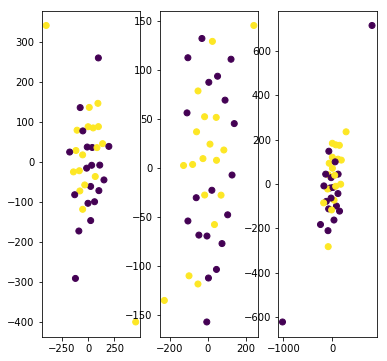

In [100]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
# dist_mat_sym1 = np.exp(10*dist_mat_sym)
bag_simi_pos_2d = TSNE(n_components=2,verbose=1,perplexity=30).fit_transform(bag_simi_representation_pos)
bag_simi_neg_2d = TSNE(n_components=2,verbose=1,perplexity=30).fit_transform(bag_simi_representation_neg)
bag_simi_com_2d = TSNE(n_components=2,verbose=1,perplexity=30).fit_transform(bag_simi_representation_com)

plt.figure(figsize=(6,6))
plt.subplot(1,3,1)
plt.scatter(bag_simi_pos_2d[:,0],bag_simi_pos_2d[:,1],c=cell_label_list)
plt.subplot(1,3,2)
plt.scatter(bag_simi_neg_2d[:,0],bag_simi_neg_2d[:,1],c=cell_label_list)
plt.subplot(1,3,3)
plt.scatter(bag_simi_com_2d[:,0],bag_simi_com_2d[:,1],c=cell_label_list)

plt.show()




In [53]:
dist_mat_sym = np.zeros(shape=(num_cell,num_cell))
for i in range(num_cell):
    for j in range(num_cell):
        dist_mat_sym[i,j] = max(dist_mat[i,j],dist_mat[j,i])
        dist_mat_sym[j,i] = max(dist_mat[i,j],dist_mat[j,i])
#         dist_mat_sym[i,j] = np.exp(10*dist_mat_sym[i,j])
#         dist_mat_sym[j,i] = np.exp(10*dist_mat_sym[j,i])

[t-SNE] Computing 36 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 37 / 37
[t-SNE] Mean sigma: 0.119500
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.028459
[t-SNE] Error after 325 iterations: 1.028459


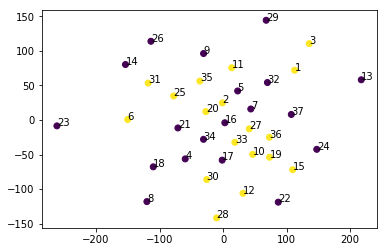

In [59]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
dist_mat_sym1 = np.exp(10*dist_mat_sym)
y2 = TSNE(metric='precomputed',n_components=2,verbose=1,perplexity=20).fit_transform(dist_mat_sym1)
plt.figure(figsize=(6,6))
fig,ax=plt.subplots()
# fig,ax=plt.figure(figsize=(6,6))
ax.scatter(y2[:,0],y2[:,1],c=cell_label_list)
# plt.show()
# ax
for i in range(num_cell):
    
    ax.annotate(i+1, (y2[i,0],y2[i,1]))
plt.show()

In [9]:
cell_label_list

[2.0,
 2.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 2.0,
 2.0,
 1.0,
 2.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 2.0,
 1.0]

In [18]:
i=0
j=6

print(dist_mat[i,j],dist_mat[j,i])
print(cell_label_list[i],cell_label_list[j])

0.0111443417887 0.0212350245565
2.0 1.0


In [113]:
np.exp(10*dist_mat_sym)

array([[  69.56286949,   75.36669921,   75.63722538, ...,   92.6695518 ,
          77.57139269,  161.92240065],
       [  75.36669921,   67.28223   ,   78.05599584, ...,   89.36605208,
          78.98823251,  142.60792415],
       [  75.63722538,   78.05599584,   66.55347737, ...,   98.56622237,
          82.6523734 ,  176.67095747],
       ..., 
       [  92.6695518 ,   89.36605208,   98.56622237, ...,   79.58963765,
          86.95315994,  134.77964328],
       [  77.57139269,   78.98823251,   82.6523734 , ...,   86.95315994,
          68.29619353,  139.38383644],
       [ 161.92240065,  142.60792415,  176.67095747, ...,  134.77964328,
         139.38383644,  115.15532714]])

In [101]:
np.exp(10*0.47)

109.94717245212343

In [92]:
i=0
j1=0
j2=1
j3=3
j4=4
j5=5
j6=6
scores1 = evaluate_cell(ae_li[0],cell_pixel_dict[j1+1])
scores2 = evaluate_cell(ae_li[0],cell_pixel_dict[j2+1])
scores3 = evaluate_cell(ae_li[0],cell_pixel_dict[j3+1])
scores4 = evaluate_cell(ae_li[0],cell_pixel_dict[j4+1])
scores5 = evaluate_cell(ae_li[0],cell_pixel_dict[j5+1])
scores6 = evaluate_cell(ae_li[0],cell_pixel_dict[j6+1])


1/1 [==============================] - 0s


1/1 [==============================] - 0s


In [81]:
np.mean(scores)

0.02841552771089307

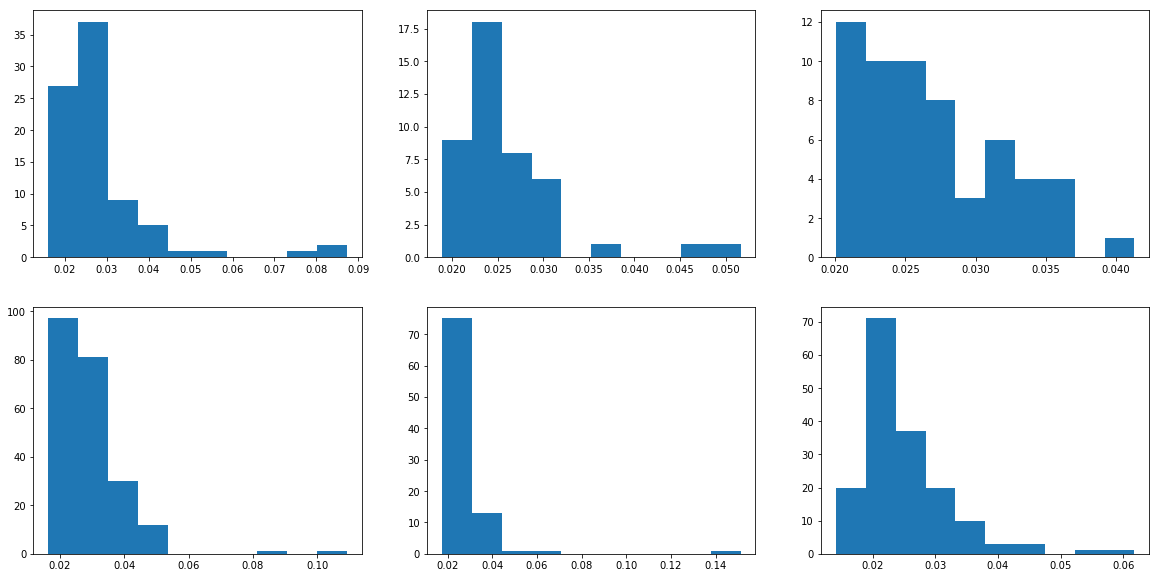

In [93]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.hist(scores1)
plt.subplot(2,3,2)
plt.hist(scores2)
plt.subplot(2,3,3)
plt.hist(scores3)
plt.subplot(2,3,4)
plt.hist(scores4)
plt.subplot(2,3,5)
plt.hist(scores5)
plt.subplot(2,3,6)
plt.hist(scores6)
plt.show()


In [19]:
cell_mean_mat = np.zeros(shape=(num_cell,num_features))
for i in range(num_cell):
    cur_cell = cell_pixel_dict[i+1]
    cur_cell_mean = np.mean(cur_cell)
    cell_mean_mat[i,:] = cur_cell_mean

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 36 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 37 / 37
[t-SNE] Mean sigma: 1.752954
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.360018
[t-SNE] Error after 125 iterations: 1.360018


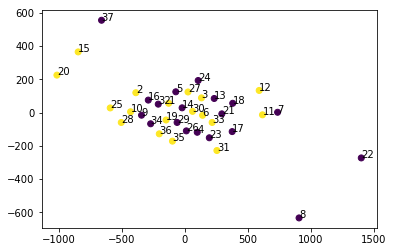

In [21]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
# dist_mat_sym1 = np.exp(10*dist_mat_sym)
y2 = TSNE(n_components=2,verbose=1,perplexity=30,init='pca').fit_transform(cell_mean_mat)
plt.figure(figsize=(6,6))
fig,ax=plt.subplots()
# fig,ax=plt.figure(figsize=(6,6))
ax.scatter(y2[:,0],y2[:,1],c=cell_label_list)
# plt.show()
# ax
for i in range(num_cell):
    
    ax.annotate(i+1, (y2[i,0],y2[i,1]))
plt.show()

In [72]:
from sklearn.mixture import GaussianMixture
gaussians = []
for i in range(num_cell):
    cur_cell = cell_pixel_dict[i+1]
    cur_label = cell_label_list[i]
    print('processing {i}th cell'.format(i=i))
    cur_gaussian = GaussianMixture(n_components=10,verbose=1).fit(cur_cell)
    gaussians.append(cur_gaussian)
    

processing 0th cell
Initialization 0
  Iteration 0
Initialization converged: True
processing 1th cell
Initialization 0
  Iteration 0
Initialization converged: True
processing 2th cell
Initialization 0
  Iteration 0
Initialization converged: True
processing 3th cell
Initialization 0
  Iteration 0
Initialization converged: True
processing 4th cell
Initialization 0
  Iteration 0
Initialization converged: True
processing 5th cell
Initialization 0
  Iteration 0
Initialization converged: True
processing 6th cell
Initialization 0
  Iteration 0
Initialization converged: True
processing 7th cell
Initialization 0
  Iteration 0
Initialization converged: True
processing 8th cell
Initialization 0
  Iteration 0
Initialization converged: True
processing 9th cell
Initialization 0
  Iteration 0
Initialization converged: True
processing 10th cell
Initialization 0
  Iteration 0
Initialization converged: True
processing 11th cell
Initialization 0
  Iteration 0
Initialization converged: True
processing 12t

In [73]:
dist_mat = np.zeros(shape=(num_cell,num_cell))
for i in range(num_cell):
    for j in range(num_cell):
        i_gaussian = gaussians[i]
        j_cell = cell_pixel_dict[j+1]
        dist_mat[i,j] = i_gaussian.score(j_cell)

        

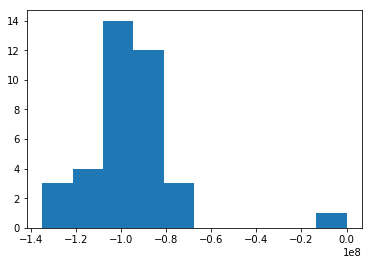

In [74]:
plt.hist(dist_mat[:,0])
plt.show()

In [63]:
cell_pixel_dict[2]

array([[ 0.        , -0.24539121, -0.33730159, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.03600726,  0.72366522, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.3074781 , -0.03226363, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.41722846, -0.28021978, ...,  0.        ,
         0.02564103,  0.02564103],
       [ 0.        ,  0.95228499, -0.74206349, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.58837568, -0.15853175, ...,  0.        ,
         0.        ,  0.        ]])

In [2]:
1+1

2